<a href="https://colab.research.google.com/github/shivams289/Projects/blob/main/Promotion_Sales_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy.stats as stats
from prettytable import PrettyTable
plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
# Let's read the data in 4 dataframes
#dataframe consisting of price, units, sales etc
data = pd.read_excel('data.xlsx')

#Variable info dataframe
info = pd.read_excel('glossry.xlsx')

#Products info dataframe
prod = pd.read_excel('product_lookup.xlsx')

#store info dataframe
store = pd.read_excel('store_lookup.xlsx')

In [ ]:
info

,VARIABLE NAME,TABLE,DESCRIPTION
0,ADDRESS_CITY_NAME,store lookup,city
1,ADDRESS_STATE_PROV_CODE,store lookup,state
2,AVG_WEEKLY_BASKETS,store lookup,average weekly baskets sold in the store
3,BASE_PRICE,data,base price of item
4,MANUFACTURER,products lookup,manufacturer
5,CATEGORY,products lookup,category of product
6,DESCRIPTION,products lookup,prodcut description
7,DISPLAY,data,product was a part of in-store promotional dis...
8,FEATURE,data,product was in in-store circular
9,HHS,data,# of purchasing households


In [ ]:
#UNiques UPC's are 58 in products table
len(set(prod.UPC))

58

In [ ]:
#UNiques UPC's are 55 in data table
len(set(data.UPC))

55

In [ ]:
#Check for missing values in products table
prod.isna().mean()

UPC             0.0
DESCRIPTION     0.0
MANUFACTURER    0.0
CATEGORY        0.0
SUB_CATEGORY    0.0
PRODUCT_SIZE    0.0
dtype: float64

In [ ]:
#check for missing values in data table
data.isna().mean()

WEEK_END_DATE    0.000000
STORE_NUM        0.000000
UPC              0.000000
UNITS            0.000000
VISITS           0.000000
HHS              0.000000
SPEND            0.000000
PRICE            0.000044
BASE_PRICE       0.000352
FEATURE          0.000000
DISPLAY          0.000000
TPR_ONLY         0.000000
dtype: float64

In [ ]:
#Lets see if our product table has all the UPC's as data table to apply join
set(data.UPC) - set(prod.UPC)

set()

In [ ]:
#inner join the product and data tables because we will need to find out the thresholds 
#for each brand in each subcategory
df = pd.merge(data, prod, on = ['UPC'], how = 'inner')

In [ ]:
#Lets make a column of years, as price data will show inflation for every year, some price increase is justified 
#for the consumers
df['YEAR']  = pd.to_datetime(df['WEEK_END_DATE'], infer_datetime_format=True).dt.year

In [ ]:
df.dropna(axis =0, inplace = True)
df.reset_index(inplace = True, drop= True)

In [ ]:
round(3.33355467, 0)

3.0

In [ ]:
'FEATURE'*1 + 'TPR_ONLY'*1

'FEATURETPR_ONLY'

In [ ]:
df['PER_DISCOUNT'] = round((df.BASE_PRICE - df.PRICE)/df.BASE_PRICE*100*df.TPR_ONLY, 0)

#0 ->NO PROMO(all 3 ==0)
#1 ->DISPLAY(other 2 ==0)
#2 ->FEATURE( other 2 = 0)
#3 ->FEATURE+DISPLAY(TPR_ONLY ==0)
#4 ->TPR_ONLY(all other == 0)
df['PROMO'] = 1*df.DISPLAY + 2*df.FEATURE + 4*df.TPR_ONLY
df['PROMO'] = df.PROMO.map({0:'NO PROMO', 1:'DISPLAY', 2:'FEATURE', 3:'FEATURE+DISPLAY', 4:'TPR_ONLY',})

In [ ]:
set(df.PROMO)

{'DISPLAY', 'FEATURE', 'FEATURE+DISPLAY', 'NO PROMO', 'TPR_ONLY'}

In [ ]:
set(df.loc[df.DISPLAY == 1, 'TPR_ONLY'])

{0}

In [ ]:
set(df.loc[df.FEATURE == 1, 'TPR_ONLY'])

{0}

In [ ]:
set(df.PROMO)

{0, 1, 2, 3}

In [ ]:
len(set(df['PER_DISCOUNT']))

75

In [ ]:
#check if UPC is conserved
len(set(df.UPC))

55

In [ ]:
#check if rows are conserved
df.shape

(524950, 17)

In [ ]:
#check if new NANs are created
df.isna().mean()

WEEK_END_DATE    0.000000
STORE_NUM        0.000000
UPC              0.000000
UNITS            0.000000
VISITS           0.000000
HHS              0.000000
SPEND            0.000000
PRICE            0.000044
BASE_PRICE       0.000352
FEATURE          0.000000
DISPLAY          0.000000
TPR_ONLY         0.000000
DESCRIPTION      0.000000
MANUFACTURER     0.000000
CATEGORY         0.000000
SUB_CATEGORY     0.000000
PRODUCT_SIZE     0.000000
dtype: float64

In [ ]:
#4 Categories are there
set(df.CATEGORY)

{'BAG SNACKS', 'COLD CEREAL', 'FROZEN PIZZA', 'ORAL HYGIENE PRODUCTS'}

In [ ]:
# 7 subcategories
set(df.SUB_CATEGORY)

{'ADULT CEREAL',
 'ALL FAMILY CEREAL',
 'KIDS CEREAL',
 'MOUTHWASH/RINSES AND SPRAYS',
 'MOUTHWASHES (ANTISEPTIC)',
 'PIZZA/PREMIUM',
 'PRETZELS'}

In [ ]:
set(df.MANUFACTURER)

{'CHATTEM',
 'COLGATE',
 'FRITO LAY',
 'GENERAL MI',
 'KELLOGG',
 'KING',
 'MKSL',
 'P & G',
 'POST FOODS',
 'PRIVATE LABEL',
 'QUAKER',
 'SHULTZ',
 'SNYDER S',
 'TOMBSTONE',
 'TONYS',
 'WARNER'}

In [ ]:
#For each manufacturer each product categoy and further subcategoy can have different price threholds

In [ ]:
#BAG SNACKS ONLY HAS PRETZELS
set(df.loc[df.CATEGORY == 'BAG SNACKS', 'SUB_CATEGORY'])

{'PRETZELS'}

In [ ]:
#COLD CEREAL HAS {'ADULT CEREAL', 'ALL FAMILY CEREAL', 'KIDS CEREAL'}
set(df.loc[df.CATEGORY == 'COLD CEREAL', 'SUB_CATEGORY'])

{'ADULT CEREAL', 'ALL FAMILY CEREAL', 'KIDS CEREAL'}

In [ ]:
set(df.loc[df.CATEGORY == 'FROZEN PIZZA', 'SUB_CATEGORY'])

{'PIZZA/PREMIUM'}

In [ ]:
set(df.loc[df.CATEGORY == 'ORAL HYGIENE PRODUCTS', 'SUB_CATEGORY'])

{'MOUTHWASH/RINSES AND SPRAYS', 'MOUTHWASHES (ANTISEPTIC)'}

In [ ]:
for brand in set(df.MANUFACTURER):
    print(brand, ' has only ', set(df.loc[(df.MANUFACTURER == brand), 'CATEGORY' ]), ' categories')
    print('-----------------------------------------------')

FRITO LAY  has only  {'BAG SNACKS'}  categories
-----------------------------------------------
KELLOGG  has only  {'COLD CEREAL'}  categories
-----------------------------------------------
KING  has only  {'FROZEN PIZZA'}  categories
-----------------------------------------------
GENERAL MI  has only  {'COLD CEREAL'}  categories
-----------------------------------------------
POST FOODS  has only  {'COLD CEREAL'}  categories
-----------------------------------------------
SHULTZ  has only  {'BAG SNACKS'}  categories
-----------------------------------------------
MKSL  has only  {'BAG SNACKS'}  categories
-----------------------------------------------
TONYS  has only  {'FROZEN PIZZA'}  categories
-----------------------------------------------
TOMBSTONE  has only  {'FROZEN PIZZA'}  categories
-----------------------------------------------
WARNER  has only  {'ORAL HYGIENE PRODUCTS'}  categories
-----------------------------------------------
P & G  has only  {'ORAL HYGIENE PRODUCTS

In [ ]:
set(df.loc[df.CATEGORY == 'BAG SNACKS', 'SUB_CATEGORY'])

{'PRETZELS'}

In [ ]:
#Let's deal with {'BAG SNACKS'} category which has only one subcategory {'PRETZELS'},so what is the threhold price 
# for {'PRETZELS'} for different brands

set(df.loc[df.SUB_CATEGORY == 'PRETZELS', 'MANUFACTURER'])

{'FRITO LAY', 'MKSL', 'PRIVATE LABEL', 'SHULTZ', 'SNYDER S'}

In [ ]:
pretz_df = df.loc[df.SUB_CATEGORY == 'PRETZELS', ['MANUFACTURER', 'PER_DISCOUNT', 'SPEND']]

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

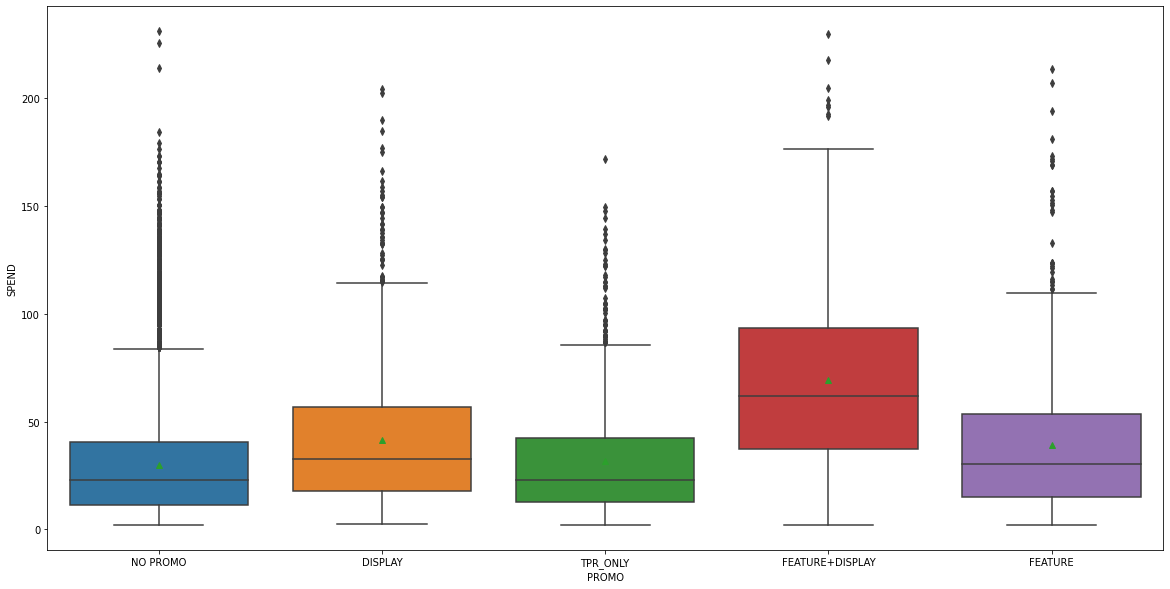

In [ ]:
#Variation of the sales for PRETZELS OF 'FRITO LAY' on Various PROMOS

sns.boxplot(y = df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS')].SPEND, x=df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS')].PROMO,  showmeans=True)

In [ ]:
set(pretz_df.MANUFACTURER)

{'FRITO LAY', 'MKSL', 'PRIVATE LABEL', 'SHULTZ', 'SNYDER S'}

In [ ]:
pretz_frito = pretz_df.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['FRITO LAY']

In [ ]:
pretz_frito.reset_index(inplace = True)
pretz_frito.columns = ['discount', 'mean_sales']

In [ ]:
pretz_mskl = pretz_df.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['MKSL']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

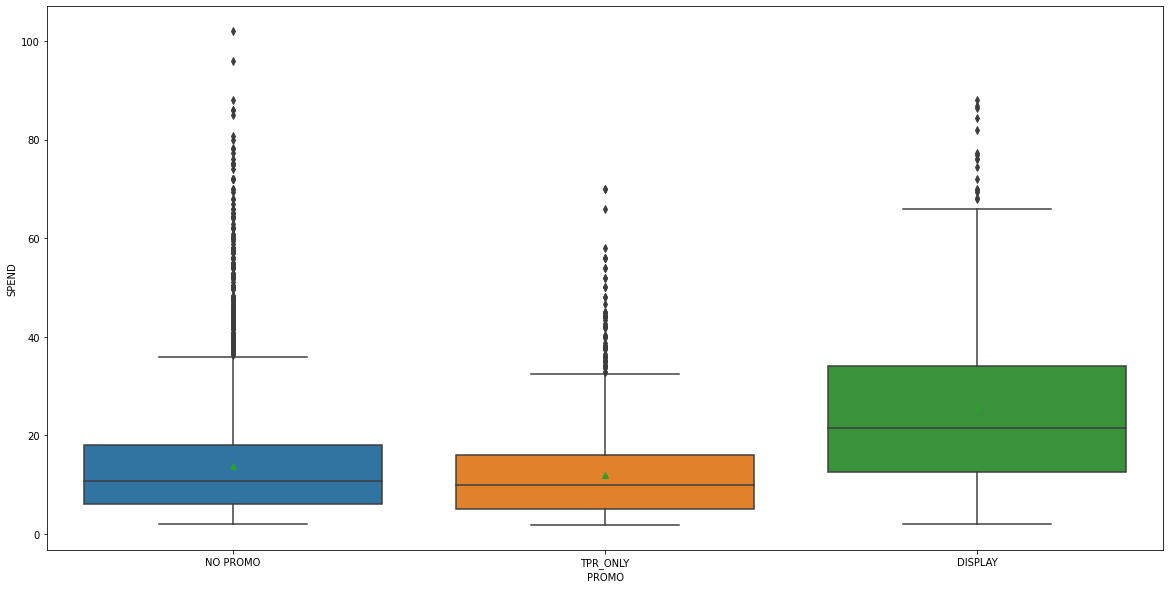

In [ ]:
#Variation of the sales for PRETZELS OF 'MKSL' on various promotions

sns.boxplot(y = df[(df.MANUFACTURER == 'MKSL') & (df.SUB_CATEGORY == 'PRETZELS')].SPEND, x=df[(df.MANUFACTURER == 'MKSL') & (df.SUB_CATEGORY == 'PRETZELS')].PROMO,  showmeans=True)

In [ ]:
pretz_mskl.reset_index(inplace = True)
pretz_mskl.columns = ['discount', 'sales_mean']

In [ ]:
pretz_private = pretz_df.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['PRIVATE LABEL']

In [ ]:
pretz_private.reset_index(inplace = True)
pretz_private.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

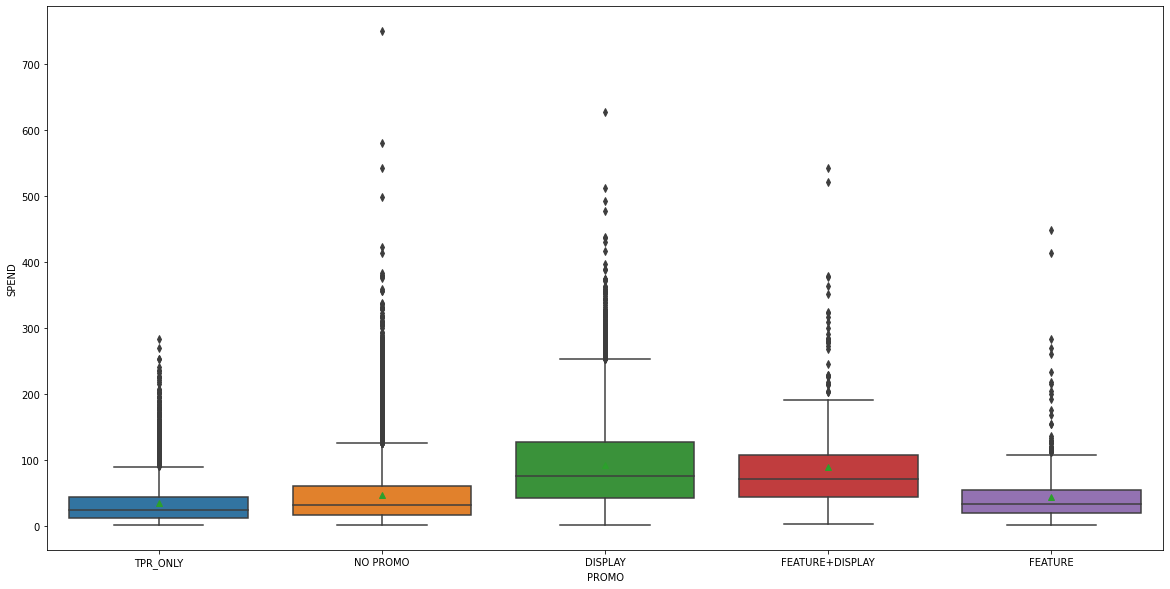

In [ ]:
#Variation of the sales for PRETZELS OF 'PRIVATE LABEL' on various Promotions

sns.boxplot(y = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS')].SPEND, x=df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS')].PROMO,  showmeans=True)

In [ ]:
pretz_shu = pretz_df.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['SHULTZ']
pretz_shu.reset_index(inplace = True)
pretz_shu.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

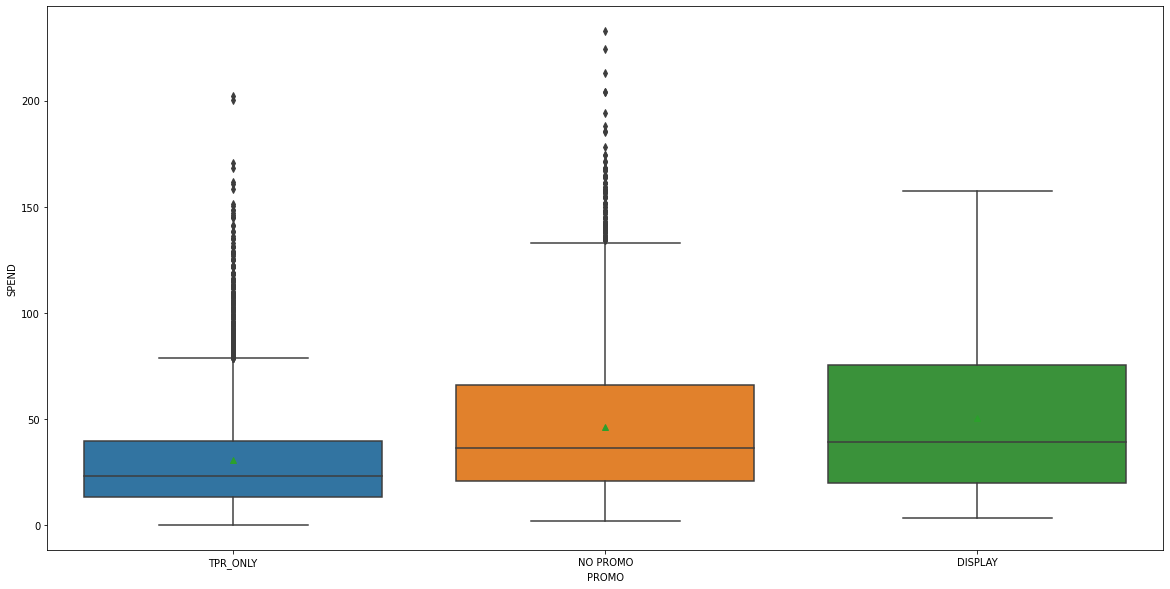

In [ ]:
#Variation of the sales for PRETZELS OF 'SHULTZ' on various Promo's

sns.boxplot(y = df[(df.MANUFACTURER == 'SHULTZ') & (df.SUB_CATEGORY == 'PRETZELS')].SPEND, x=df[(df.MANUFACTURER == 'SHULTZ') & (df.SUB_CATEGORY == 'PRETZELS')].PROMO,  showmeans=True)

In [ ]:
pretz_sny = pretz_df.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['SNYDER S']
pretz_sny.reset_index(inplace = True)
pretz_sny.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

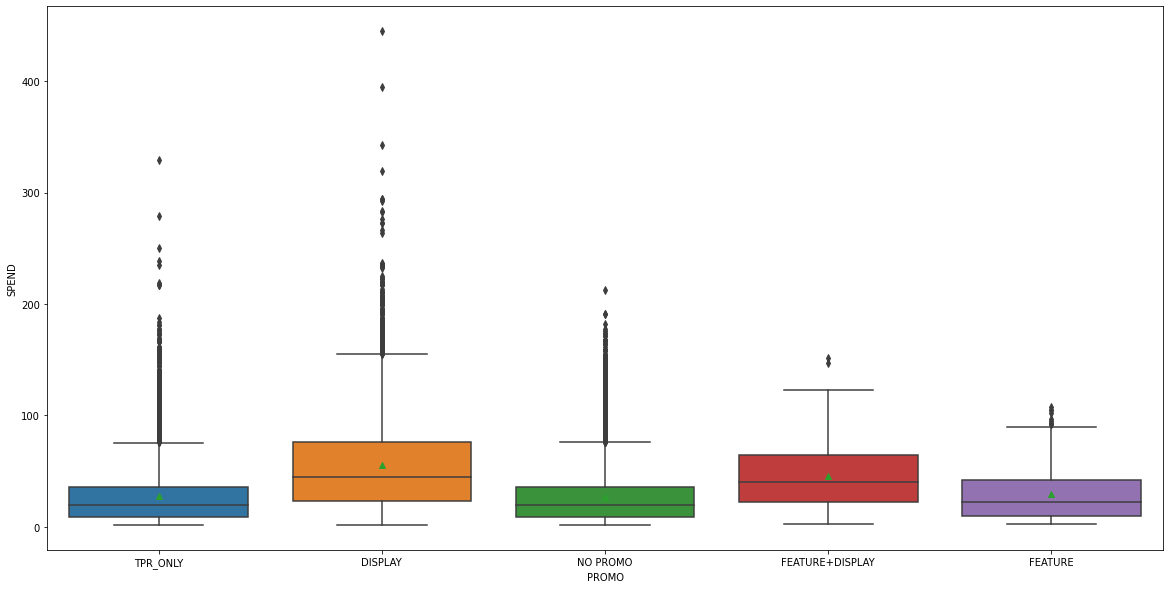

In [ ]:
#Variation of the sales for PRETZELS OF 'SNYDER S' on Various Promos

sns.boxplot(y = df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS')].SPEND, x=df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS')].PROMO,  showmeans=True)

/Users/shivams/miniconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


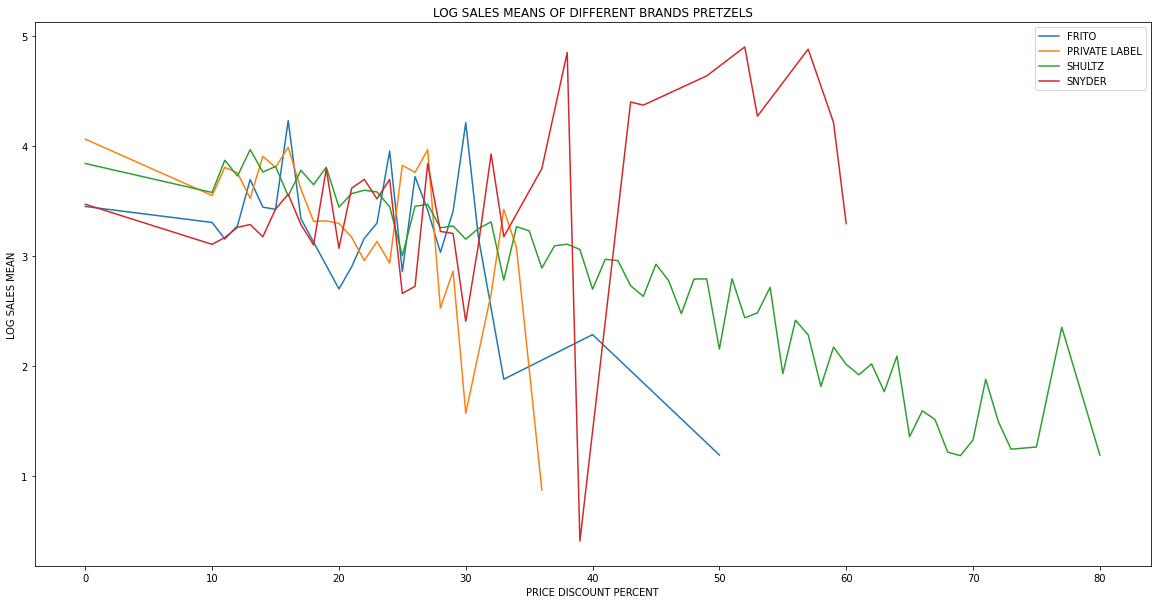

In [ ]:

fig, ax = plt.subplots()

ax.plot(pretz_frito.discount, np.log(pretz_frito.mean_sales), label = 'FRITO')
ax.plot(pretz_private.discount, np.log(pretz_private.sales_mean), label = 'PRIVATE LABEL')
ax.plot(pretz_shu.discount, np.log(pretz_shu.sales_mean), label = 'SHULTZ')
ax.plot(pretz_sny.discount, np.log(pretz_sny.sales_mean), label = 'SNYDER')
plt.title('LOG SALES MEANS OF DIFFERENT BRANDS PRETZELS')
plt.xlabel('PRICE DISCOUNT PERCENT')
plt.ylabel('LOG SALES MEAN')
plt.legend()

In [ ]:
#Quantifying results
table1 = PrettyTable()
table1.title = 'Summary Table:Sub_category -->PRETZELS'
table1.field_names = ['Parameter', 'Value']

x1 = df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x12 = df[(df.MANUFACTURER == 'MKSL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x13 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x14 = df[(df.MANUFACTURER == 'SHULTZ') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x15 = df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.mean()

y1 = df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y12 = df[(df.MANUFACTURER == 'MKSL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y13 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y14 = df[(df.MANUFACTURER == 'SHULTZ') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y15 = df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()

y2 = df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y23 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y25 = df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()

y3 = df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE')].SPEND.mean()
y33 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE')].SPEND.mean()
y35 = df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE')].SPEND.mean()

y4 = df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y42 = df[(df.MANUFACTURER == 'MKSL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y43 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y44 = df[(df.MANUFACTURER == 'SHULTZ') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y45 = df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND.mean()

z1 = df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.std()
z12 = df[(df.MANUFACTURER == 'MKSL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.std()
z13 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.std()
z14 = df[(df.MANUFACTURER == 'SHULTZ') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.std()
z15 = df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'NO PROMO')].SPEND.std()

p1 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND, x1+3*z1, kind='mean'))
p12 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'MKSL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND, x12+3*z12, kind='mean'))
p13 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND, x13+3*z13, kind='mean'))
p14 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'SHULTZ') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND, x14+3*z14, kind='mean'))
p15 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'TPR_ONLY')].SPEND, x15+3*z15, kind='mean'))

p2 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE')].SPEND, x1+3*z1, kind='mean'))
p23 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE')].SPEND, x13+3*z13, kind='mean'))
p25 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE')].SPEND, x15+3*z15, kind='mean'))

p3 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND, x1+3*z1, kind='mean'))
p32 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'MKSL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND, x12+3*z12, kind='mean'))
p33 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND, x13+3*z13, kind='mean'))
p34 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'SHULTZ') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND, x14+3*z14, kind='mean'))
p35 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'DISPLAY')].SPEND, x15+3*z15, kind='mean'))

p4 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'FRITO LAY') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x1+3*z1, kind='mean'))
p43 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x13+3*z13, kind='mean'))
p45 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'SNYDER S') & (df.SUB_CATEGORY == 'PRETZELS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x15+3*z15, kind='mean'))

table1.add_row(['---------------------------TPR_ONLY VS NO PROMO-----------------------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of FRITO LAY PRETZELS:TPR_ONLY Vs NO PROMO--->', y1/x1])
table1.add_row(['Ratio Of Mean Sales Of MSKL LAY PRETZELS:TPR_ONLY Vs NO PROMO--->', y12/x12])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL PRETZELS:TPR_ONLY Vs NO PROMO--->', y13/x13])
table1.add_row(['Ratio Of Mean Sales Of SHULTZ PRETZELS:TPR_ONLY Vs NO PROMO--->', y14/x14])
table1.add_row(['Ratio Of Mean Sales Of SNYDER S PRETZELS:TPR_ONLY Vs NO PROMO--->', y15/x15])

table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of FRITO LAY PRETZELS:TPR_ONLY->', p1])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of MSKL PRETZELS:TPR_ONLY->', p12])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE PRETZELS:TPR_ONLY->', p13])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of SHULTZ PRETZELS:TPR_ONLY->', p14])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of SNYDER S PRETZELS:TPR_ONLY->', p15])
table1.add_row(['---------------------------FEATURE VS NO PROMO-------------------------------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of FRITO LAY PRETZELS:FEATURE Vs NO PROMO--->', y3/x1])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL PRETZELS:FEATURE Vs NO PROMO--->', y33/x13])
table1.add_row(['Ratio Of Mean Sales Of SNYDER S PRETZELS:FEATURE Vs NO PROMO--->', y35/x15])

table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of FRITO LAY PRETZELS:FEATURE->', p2])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL PRETZELS:FEATURE->', p23])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of SNYDER S PRETZELS:FEATURE->', p25])
table1.add_row(['---------------------------DISPLAY VS NO PROMO------------------------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of FRITO LAY PRETZELS:DISPLAY Vs NO PROMO--->', y4/x1])
table1.add_row(['Ratio Of Mean Sales Of MSKL PRETZELS:DISPLAY Vs NO PROMO--->', y42/x12])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL PRETZELS:DISPLAY Vs NO PROMO--->', y43/x13])
table1.add_row(['Ratio Of Mean Sales Of SHULTZ PRETZELS:DISPLAY Vs NO PROMO--->', y44/x14])
table1.add_row(['Ratio Of Mean Sales Of SNYDER S PRETZELS:DISPLAY Vs NO PROMO--->', y45/x15])

table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of FRITO LAY PRETZELS:DISPLAY->', p3])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of MSKL PRETZELS:DISPLAY->', p32])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL PRETZELS:DISPLAY->', p33])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of SHULTZ PRETZELS:DISPLAY->', p34])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of SNYDER S PRETZELS:DISPLAY->', p35])
table1.add_row(['---------------------------FEATURE+DISPLAY VS NO PROMO------------------------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of FRITO LAY PRETZELS:FEATURE+DISPLAY Vs NO PROMO--->', y2/x1])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL PRETZELS:FEATURE+DISPLAY Vs NO PROMO--->', y23/x13])
table1.add_row(['Ratio Of Mean Sales Of SNYDER S PRETZELS:FEATURE+DISPLAY Vs NO PROMO--->', y25/x15])

table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of FRITO LAY PRETZELS:FEATURE+DISPLAY->', p4])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL PRETZELS:FEATURE+DISPLAY->', p43])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of SNYDER S PRETZELS:FEATURE+DISPLAY->', p45])


print(table1)

+------------------------------------------------------------------------------------------------------------------------+
|                                         Summary Table:Sub_category -->PRETZELS                                         |
+--------------------------------------------------------------------------------------------------+---------------------+
|                                            Parameter                                             |        Value        |
+--------------------------------------------------------------------------------------------------+---------------------+
|     ---------------------------TPR_ONLY VS NO PROMO-----------------------------------------     |         ---         |
|                Ratio Of Mean Sales Of FRITO LAY PRETZELS:TPR_ONLY Vs NO PROMO--->                |  1.0583413396936403 |
|                Ratio Of Mean Sales Of MSKL LAY PRETZELS:TPR_ONLY Vs NO PROMO--->                 |  0.8687153648973941 |
|              R

In [ ]:
#We can see that FRITO LAY , PRETZELS had the most effect of Promotion on Sales w.r.t to NO PROMO while SNYDER S 
# had large number of outlier Sales than NO PROMO, SO SNYDER S wins in TPR_ONLY category with Ratio = 1.054, 
#and outlier Spend = 3.3%

In [ ]:
# We can see FRITO LAY PRETZELS wins in Sales Impact of FEATURE PROMOTION, Mean Ratio being = 1.31 and 
#Outlier Spend datapoints = 5% 

In [ ]:
#Impact on Sales of Display is won by SNYDER S PRETZELS with mean ratio = 2.1 and Outlier Spend 
#above 3 standard deviation of NO promo Spend = 14%

In [ ]:
#Impact on Sales of Display+FEATURE is won by FRITO LAY PRETZELS with mean ratio = 2.31 and Outlier Spend 
#above 3 standard deviation of NO promo Spend = 18%

In [ ]:
#Conclusion so If I were to sell PRETZLES ...PRETZELS would be of FRITO LAY brand and Promo type 
#would be FEATURE+DISPLAY

In [ ]:
#Lets now go to frozen pizza category with just one subcategory {'PIZZA/PREMIUM'}
# which are sold by only 4 brands below

In [ ]:
set(df.loc[df.SUB_CATEGORY == 'PIZZA/PREMIUM', 'MANUFACTURER'])

{'KING', 'PRIVATE LABEL', 'TOMBSTONE', 'TONYS'}

In [ ]:
pizza_df = df.loc[df.SUB_CATEGORY == 'PIZZA/PREMIUM', ['MANUFACTURER', 'PER_DISCOUNT', 'SPEND']]

<AxesSubplot:xlabel='MANUFACTURER', ylabel='SPEND'>

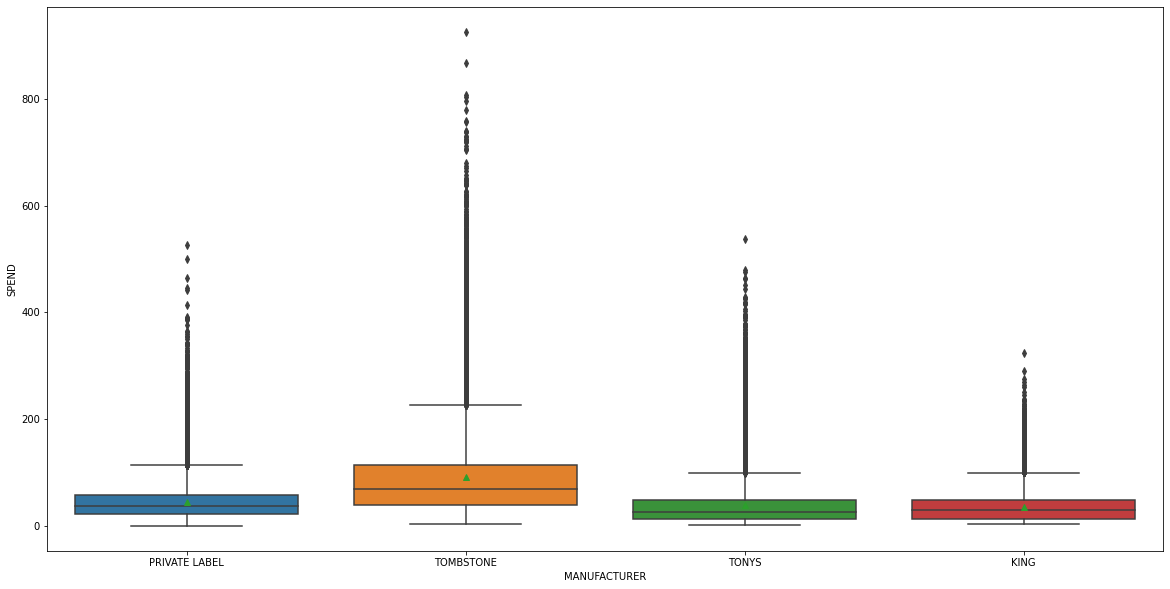

In [ ]:
#'TOMBSTONE' has most no. of outlier spend, a higher mean spend, larger IQR spend and higher varibility in the spend
#'PRIVATE LABEL' and 'TONYS' seems to have same variability in spend but 'TONYS' having lower mean spend
sns.boxplot(x = pizza_df.MANUFACTURER, y = pizza_df.SPEND,  showmeans=True)

In [ ]:
pizza_king = pizza_df.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['KING']
pizza_king.reset_index(inplace = True)
pizza_king.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

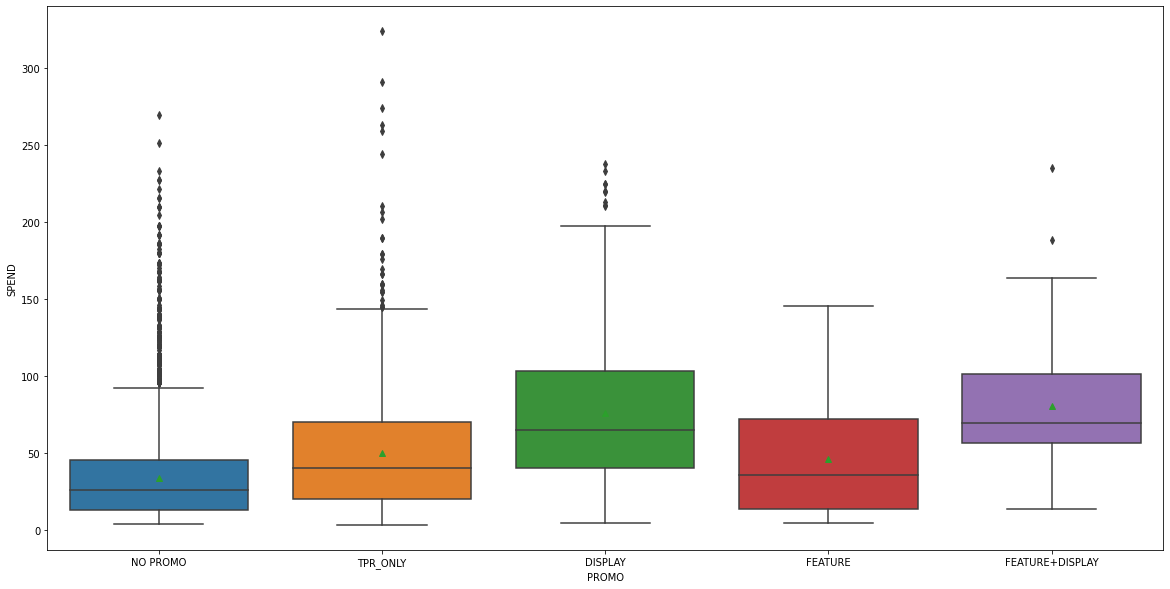

In [ ]:
#Variation of the sales for PIZZA OF 'KING' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM')].SPEND, x=df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM')].PROMO,  showmeans=True)

In [ ]:
pizza_private = pizza_df.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['PRIVATE LABEL']
pizza_private.reset_index(inplace = True)
pizza_private.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

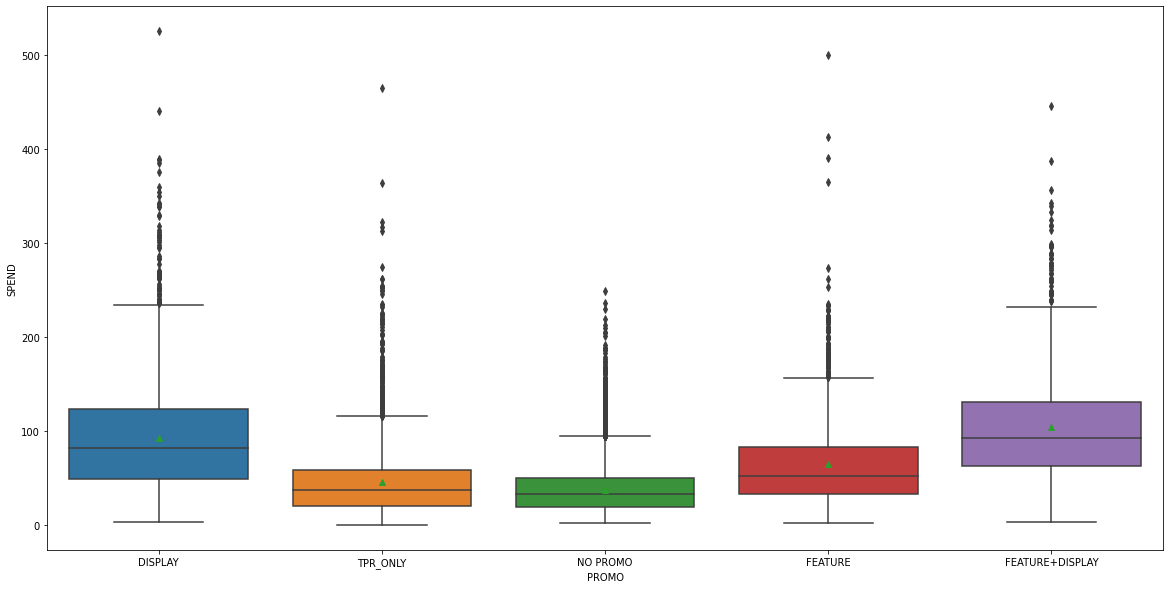

In [ ]:
#Variation of the sales for PIZZA OF 'PRIVATE LABEL' on on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM')].SPEND, x=df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM')].PROMO,  showmeans=True)

In [ ]:
pizza_tomb = pizza_df.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['TOMBSTONE']
pizza_tomb.reset_index(inplace = True)
pizza_tomb.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

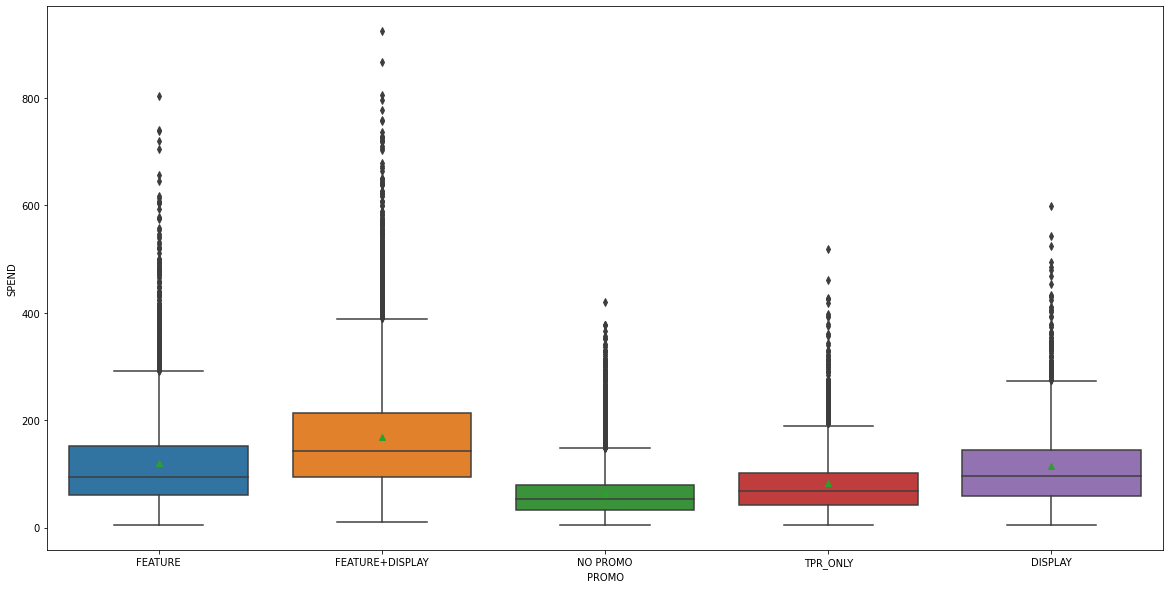

In [ ]:
#Variation of the sales for PIZZA OF 'TOMBSTONE' on on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM')].SPEND, x=df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM')].PROMO,  showmeans=True)

In [ ]:
pizza_tony = pizza_df.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['TONYS']
pizza_tony.reset_index(inplace = True)
pizza_tony.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

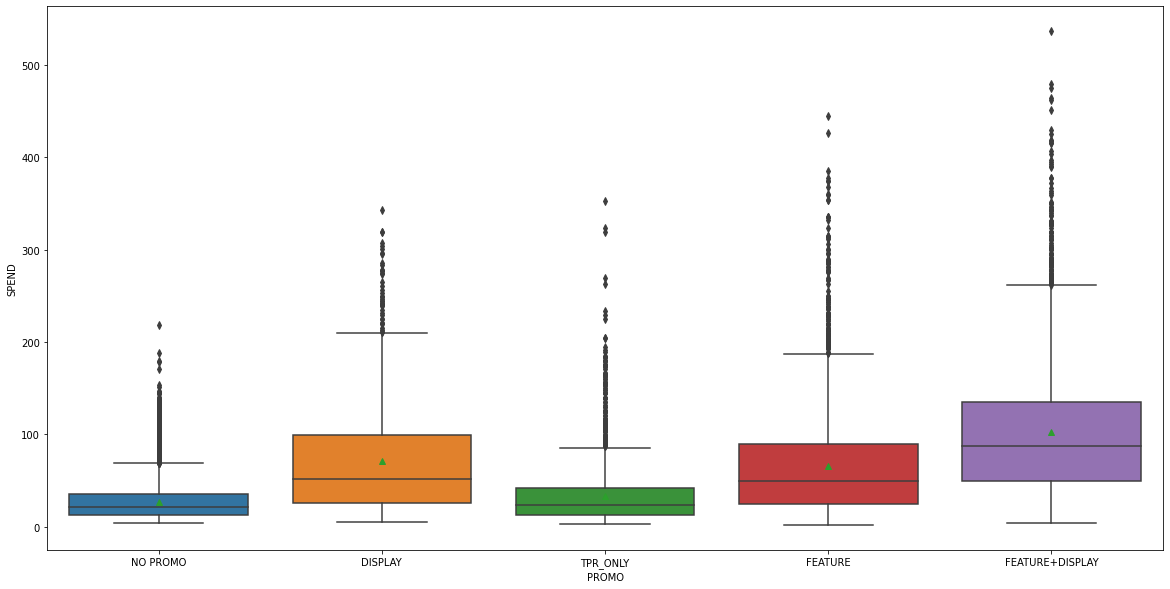

In [ ]:
#Variation of the sales for PIZZA OF 'TONYS' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM')].SPEND, x=df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM')].PROMO,  showmeans=True)

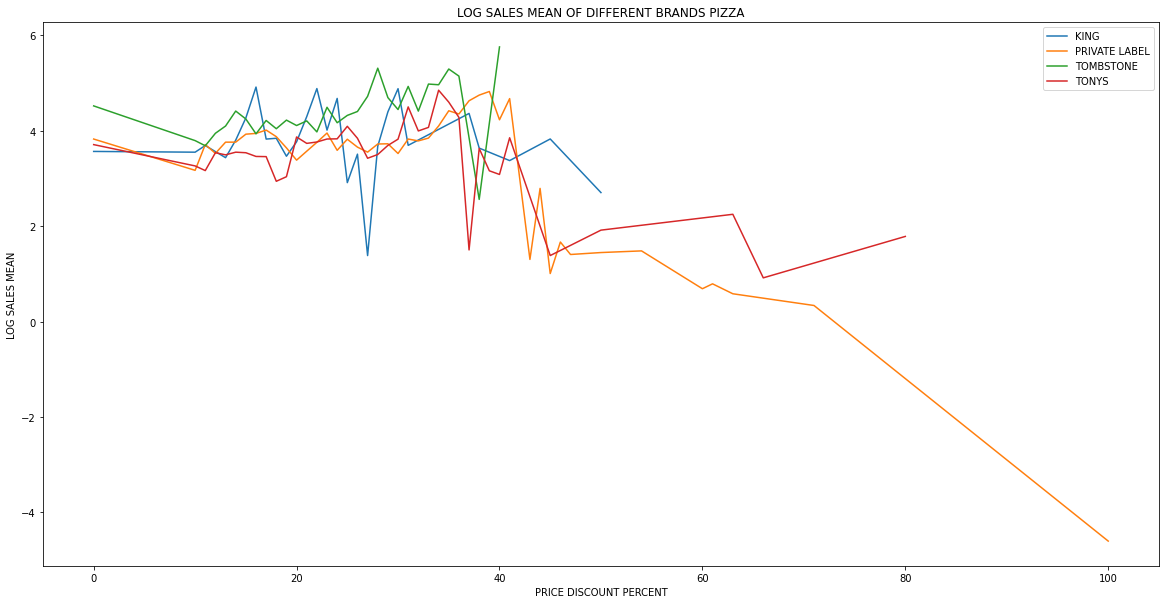

In [ ]:



fig, ax = plt.subplots()

ax.plot(pizza_king.discount, np.log(pizza_king.sales_mean), label = 'KING')
ax.plot(pizza_private.discount, np.log(pizza_private.sales_mean), label = 'PRIVATE LABEL')
ax.plot(pizza_tomb.discount, np.log(pizza_tomb.sales_mean), label = 'TOMBSTONE')
ax.plot(pizza_tony.discount, np.log(pizza_tony.sales_mean), label = 'TONYS')
plt.title('LOG SALES MEAN OF DIFFERENT BRANDS PIZZA')
plt.xlabel('PRICE DISCOUNT PERCENT')
plt.ylabel('LOG SALES MEAN')
plt.legend()

In [ ]:
#Quantifying results
table1 = PrettyTable()
table1.title = 'Summary Table:Sub_category -->PIZZA/PREMIUM'
table1.field_names = ['Parameter', 'Value']

x1 = df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x12 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x13 = df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x14 = df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'NO PROMO')].SPEND.mean()

y1 = df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y12 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y13 = df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y14 = df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()

y2 = df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y22 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y23 = df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y24 = df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()

y3 = df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE')].SPEND.mean()
y32 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE')].SPEND.mean()
y33 = df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE')].SPEND.mean()
y34 = df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE')].SPEND.mean()

y4 = df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y42 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y43 = df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y44 = df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'DISPLAY')].SPEND.mean()

z1 = df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'NO PROMO')].SPEND.std()
z12 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'NO PROMO')].SPEND.std()
z13 = df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'NO PROMO')].SPEND.std()
z14 = df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'NO PROMO')].SPEND.std()

p1 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'TPR_ONLY')].SPEND, x1+3*z1, kind='mean'))
p12 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'TPR_ONLY')].SPEND, x12+3*z12, kind='mean'))
p13 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'TPR_ONLY')].SPEND, x13+3*z13, kind='mean'))
p14 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'TPR_ONLY')].SPEND, x14+3*z14, kind='mean'))

p2 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE')].SPEND, x1+3*z1, kind='mean'))
p22 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE')].SPEND, x12+3*z12, kind='mean'))
p23 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE')].SPEND, x13+3*z13, kind='mean'))
p24 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE')].SPEND, x14+3*z14, kind='mean'))

p3 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'DISPLAY')].SPEND, x1+3*z1, kind='mean'))
p32 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'DISPLAY')].SPEND, x12+3*z12, kind='mean'))
p33 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'DISPLAY')].SPEND, x13+3*z13, kind='mean'))
p34 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'DISPLAY')].SPEND, x14+3*z14, kind='mean'))

p4 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'KING') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x1+3*z1, kind='mean'))
p42 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY =='PIZZA/PREMIUM') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x12+3*z12, kind='mean'))
p43 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'TOMBSTONE') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x13+3*z13, kind='mean'))
p44 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'TONYS') & (df.SUB_CATEGORY == 'PIZZA/PREMIUM') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x14+3*z14, kind='mean'))

table1.add_row(['---------------------------TPR_ONLY VS NO PROMO-----------------------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of KING PIZZA/PREMIUM:TPR_ONLY Vs NO PROMO--->', y1/x1])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL PIZZA/PREMIUM:TPR_ONLY Vs NO PROMO--->', y12/x12])
table1.add_row(['Ratio Of Mean Sales Of TOMBSTONE PIZZA/PREMIUM:TPR_ONLY Vs NO PROMO--->', y13/x13])
table1.add_row(['Ratio Of Mean Sales Of TONYS PIZZA/PREMIUM:TPR_ONLY Vs NO PROMO--->', y14/x14])

table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of KING PIZZA/PREMIUM:TPR_ONLY->', p1])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL PIZZA/PREMIUM:TPR_ONLY->', p12])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of TOMBSTONE PIZZA/PREMIUM:TPR_ONLY->', p13])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of TONYS PIZZA/PREMIUM:TPR_ONLY->', p14])
table1.add_row(['---------------------------FEATURE VS NO PROMO-------------------------------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of KING PIZZA/PREMIUM:FEATURE Vs NO PROMO--->', y3/x1])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL PIZZA/PREMIUM:FEATURE Vs NO PROMO--->', y32/x12])
table1.add_row(['Ratio Of Mean Sales Of TOMBSTONE PIZZA/PREMIUM:FEATURE Vs NO PROMO--->', y33/x13])
table1.add_row(['Ratio Of Mean Sales Of TONYS PIZZA/PREMIUM:FEATURE Vs NO PROMO--->', y34/x14])

table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of KING PIZZA/PREMIUM:FEATURE->', p2])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL PIZZA/PREMIUM:FEATURE->', p22])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of TOMBSTONE PIZZA/PREMIUM:FEATURE->', p23])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of TONYS PIZZA/PREMIUM:FEATURE->', p24])
table1.add_row(['---------------------------DISPLAY VS NO PROMO------------------------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of KING PIZZA/PREMIUM:DISPLAY Vs NO PROMO--->', y4/x1])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL PIZZA/PREMIUM:DISPLAY Vs NO PROMO--->', y42/x12])
table1.add_row(['Ratio Of Mean Sales Of TOMBSTONE PIZZA/PREMIUM:DISPLAY Vs NO PROMO--->', y43/x13])
table1.add_row(['Ratio Of Mean Sales Of TONYS PIZZA/PREMIUM:DISPLAY Vs NO PROMO--->', y44/x14])

table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of KING PIZZA/PREMIUM:DISPLAY->', p3])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL PIZZA/PREMIUM:DISPLAY->', p32])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of TOMBSTONE PIZZA/PREMIUM:DISPLAY->', p33])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of TONYS PIZZA/PREMIUM:DISPLAY->', p34])
table1.add_row(['---------------------------FEATURE+DISPLAY VS NO PROMO------------------------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of KING PIZZA/PREMIUM:FEATURE+DISPLAY Vs NO PROMO--->', y2/x1])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL PIZZA/PREMIUM:FEATURE+DISPLAY Vs NO PROMO--->', y22/x12])
table1.add_row(['Ratio Of Mean Sales Of TOMBSTONE PIZZA/PREMIUM:FEATURE+DISPLAY Vs NO PROMO--->', y23/x13])
table1.add_row(['Ratio Of Mean Sales Of TONYS PIZZA/PREMIUM:FEATURE+DISPLAY Vs NO PROMO--->', y24/x14])

table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of KING PIZZA/PREMIUM:FEATURE+DISPLAY->', p4])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL PIZZA/PREMIUM:FEATURE+DISPLAY->', p42])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of TOMBSTONE PIZZA/PREMIUM:FEATURE+DISPLAY->', p43])
table1.add_row(['Percent Sales DataPoints [Above 3-Stdv Of NO PROMO] Of TONYS PIZZA/PREMIUM:FEATURE+DISPLAY->', p44])

print(table1)

+---------------------------------------------------------------------------------------------------------------------------+
|                                        Summary Table:Sub_category -->PIZZA/PREMIUM                                        |
+------------------------------------------------------------------------------------------------------+--------------------+
|                                              Parameter                                               |       Value        |
+------------------------------------------------------------------------------------------------------+--------------------+
|       ---------------------------TPR_ONLY VS NO PROMO-----------------------------------------       |        ---         |
|                  Ratio Of Mean Sales Of KING PIZZA/PREMIUM:TPR_ONLY Vs NO PROMO--->                  | 1.4815355665347236 |
|             Ratio Of Mean Sales Of PRIVATE LABEL PIZZA/PREMIUM:TPR_ONLY Vs NO PROMO--->              | 1.22096033659

In [ ]:
#From above we can see that KING PIZZA won in TPR_ONLY promotional category with Mean Ratio of 1.48 and Outlier
#Sales datapoints = 7.23% of Sales datapoints above the 3 stdv of NO PROMO category

In [ ]:
#From above we can see that TONYS PIZZA won in FEATURE promotional category with Mean Ratio of 2.48 and Outlier
#Sales datapoints = 26% of Sales datapoints above the 3 stdv of NO PROMO category

In [ ]:
#From above we can see that TONYS PIZZA won in DISPLAY promotional category with Mean Ratio of 2.7 and Outlier
#Sales datapoints = 30% of Sales datapoints above the 3 stdv of NO PROMO category
#with PRIVATE LABEL occupying the 2nd place

In [ ]:
#From above we can see that TONYS PIZZA again won in DISPLAY promotional category with Mean Ratio of 3.88 and Outlier
#Sales datapoints = 50% Sales datapoints above Sale of 3 stdv of NO PROMO category
#with PRIVATE LABEL occupying the 2nd place

In [ ]:
#Conclusion: I would be selling TONYS PIZAA with FEATURE or FEATURE+DISPLAY promotional category

In [ ]:
#Now let's go to 'ORAL HYGIENE PRODUCTS' category which has below subcategories, we will look at each 
#subcategory one by one

In [ ]:
set(df.loc[df.CATEGORY == 'ORAL HYGIENE PRODUCTS', 'SUB_CATEGORY'])

{'MOUTHWASH/RINSES AND SPRAYS', 'MOUTHWASHES (ANTISEPTIC)'}

In [ ]:
#The brands that sell these products are:
set(df.loc[df.SUB_CATEGORY == 'MOUTHWASH/RINSES AND SPRAYS', 'MANUFACTURER'])

{'CHATTEM', 'COLGATE', 'P & G'}

In [ ]:
#lets make 2 dataframes for both the categories
mouth_df1 = df.loc[df.SUB_CATEGORY == 'MOUTHWASH/RINSES AND SPRAYS', ['MANUFACTURER', 'PER_DISCOUNT', 'SPEND']]
mouth_df2 = df.loc[df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)', ['MANUFACTURER', 'PER_DISCOUNT', 'SPEND']]

<AxesSubplot:xlabel='MANUFACTURER', ylabel='SPEND'>

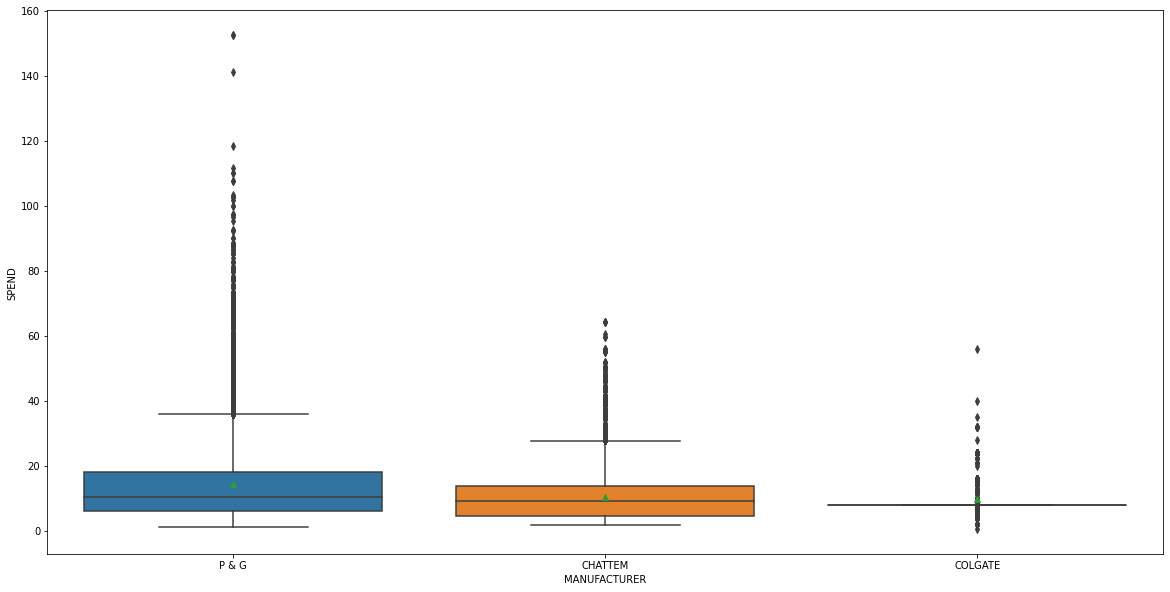

In [ ]:
#All 3 brands having same mean spend
#'P & G' and 'CHATTEM' having similar IQR of spends but 'P & G' having higher varibaility in spend with large number
#of outliers than 'CHATTEM' 
sns.boxplot(x = mouth_df1.MANUFACTURER, y = mouth_df1.SPEND,  showmeans=True)

In [ ]:
#{'CHATTEM', 'COLGATE', 'P & G'} are the brands for 'MOUTHWASH/RINSES AND SPRAYS'


mouth_chat1 = mouth_df1.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['CHATTEM']
mouth_chat1.reset_index(inplace = True)
mouth_chat1.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

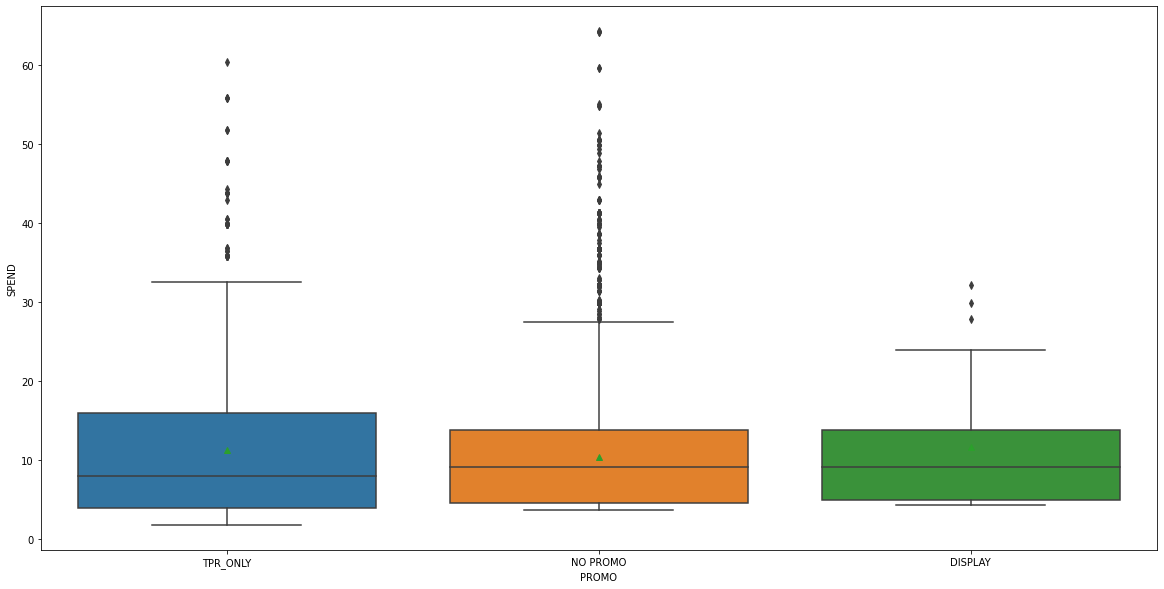

In [ ]:
#Variation of the sales for 'MOUTHWASH/RINSES AND SPRAYS' OF 'CHATTEM' on Various PROMO's
sns.boxplot(y = df[(df.MANUFACTURER == 'CHATTEM') & (df.SUB_CATEGORY == 'MOUTHWASH/RINSES AND SPRAYS')].SPEND, x=df[(df.MANUFACTURER == 'CHATTEM') & (df.SUB_CATEGORY == 'MOUTHWASH/RINSES AND SPRAYS')].PROMO,  showmeans=True)

In [ ]:
mouth_col1 = mouth_df1.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['COLGATE']
mouth_col1.reset_index(inplace = True)
mouth_col1.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

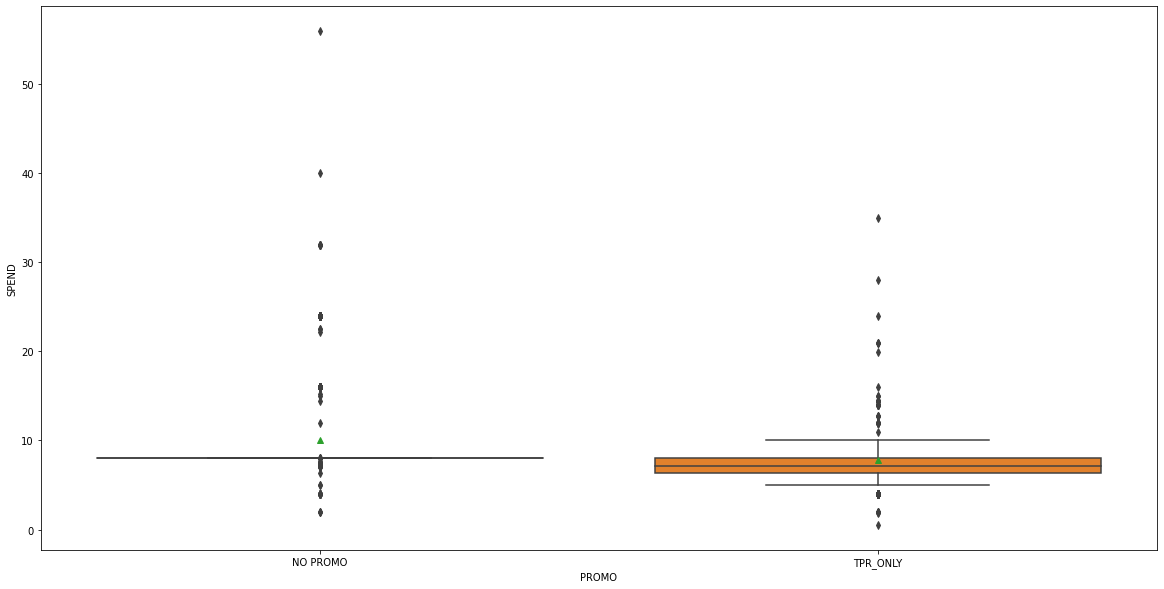

In [ ]:
#Variation of the sales for 'MOUTHWASH/RINSES AND SPRAYS' OF 'COLGATE' on Various PROMO's
sns.boxplot(y = df[(df.MANUFACTURER == 'COLGATE') & (df.SUB_CATEGORY == 'MOUTHWASH/RINSES AND SPRAYS')].SPEND, x=df[(df.MANUFACTURER == 'COLGATE') & (df.SUB_CATEGORY == 'MOUTHWASH/RINSES AND SPRAYS')].PROMO,  showmeans=True)

In [ ]:
mouth_pg1 = mouth_df1.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['P & G']
mouth_pg1.reset_index(inplace = True)
mouth_pg1.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

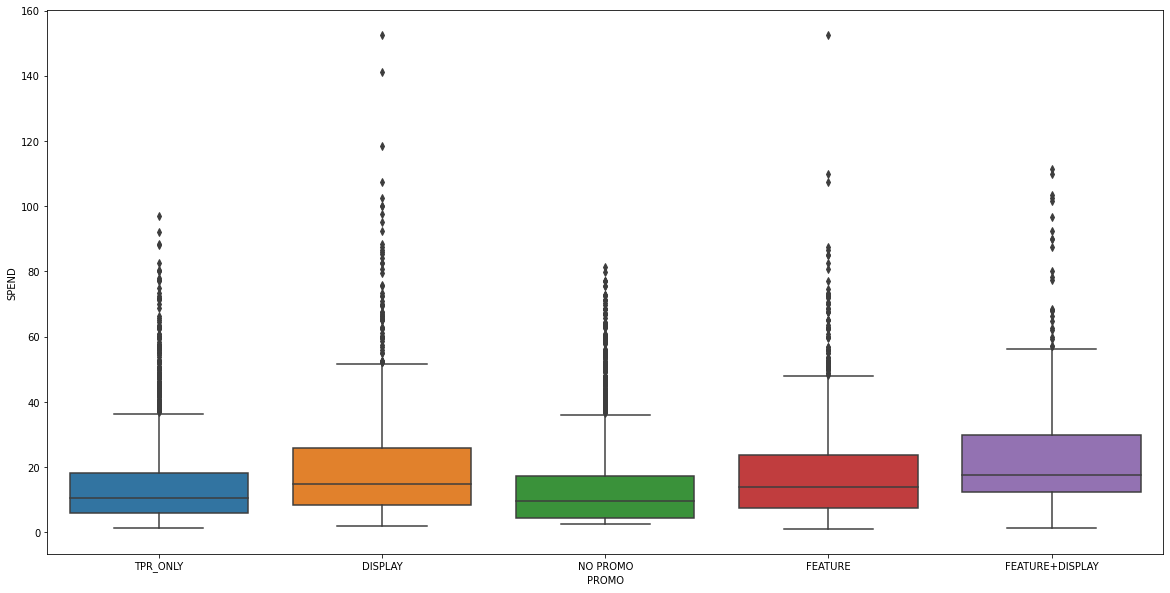

In [ ]:
#Variation of the sales for 'MOUTHWASH/RINSES AND SPRAYS' OF 'P & G' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'P & G') & (df.SUB_CATEGORY == 'MOUTHWASH/RINSES AND SPRAYS')].SPEND, x=df[(df.MANUFACTURER == 'P & G') & (df.SUB_CATEGORY == 'MOUTHWASH/RINSES AND SPRAYS')].PROMO)

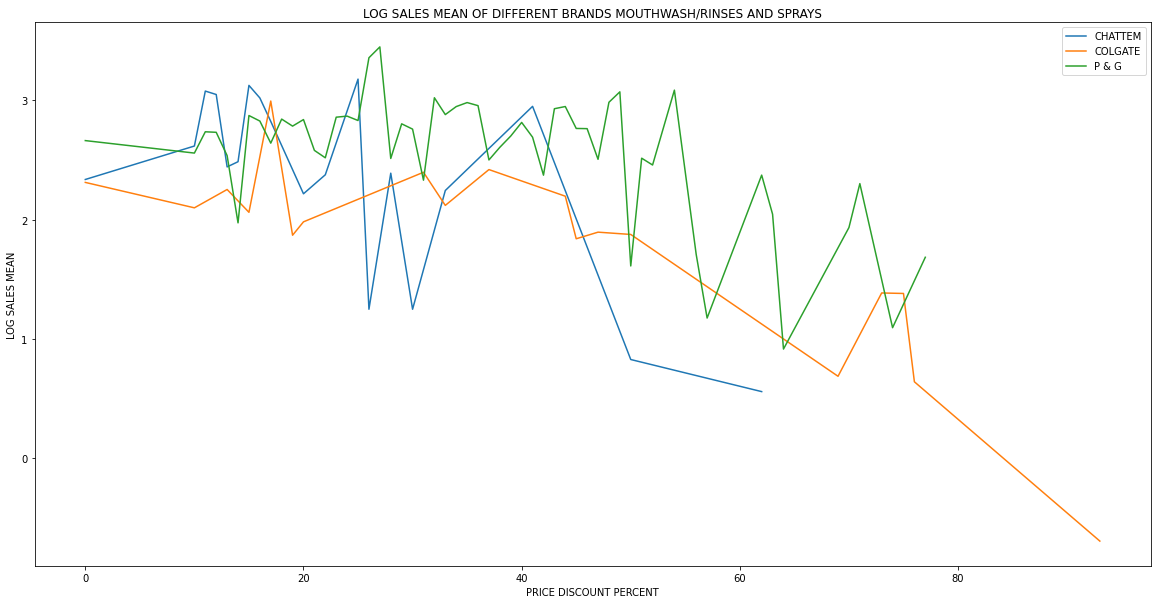

In [ ]:

fig, ax = plt.subplots()

ax.plot(mouth_chat1.discount, np.log(mouth_chat1.sales_mean), label = 'CHATTEM')
ax.plot(mouth_col1.discount, np.log(mouth_col1.sales_mean), label = 'COLGATE')
ax.plot(mouth_pg1.discount, np.log(mouth_pg1.sales_mean), label = 'P & G')
plt.title('LOG SALES MEAN OF DIFFERENT BRANDS MOUTHWASH/RINSES AND SPRAYS')
plt.xlabel('PRICE DISCOUNT PERCENT')
plt.ylabel('LOG SALES MEAN')
plt.legend()

In [ ]:
set(df.loc[df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)', 'MANUFACTURER'])

{'CHATTEM', 'P & G', 'PRIVATE LABEL', 'WARNER'}

In [ ]:
# Now for Sub category 'MOUTHWASHES (ANTISEPTIC)
#{'CHATTEM', 'P & G', 'PRIVATE LABEL', 'WARNER'} are brands for 'MOUTHWASHES (ANTISEPTIC)'

<AxesSubplot:xlabel='MANUFACTURER', ylabel='SPEND'>

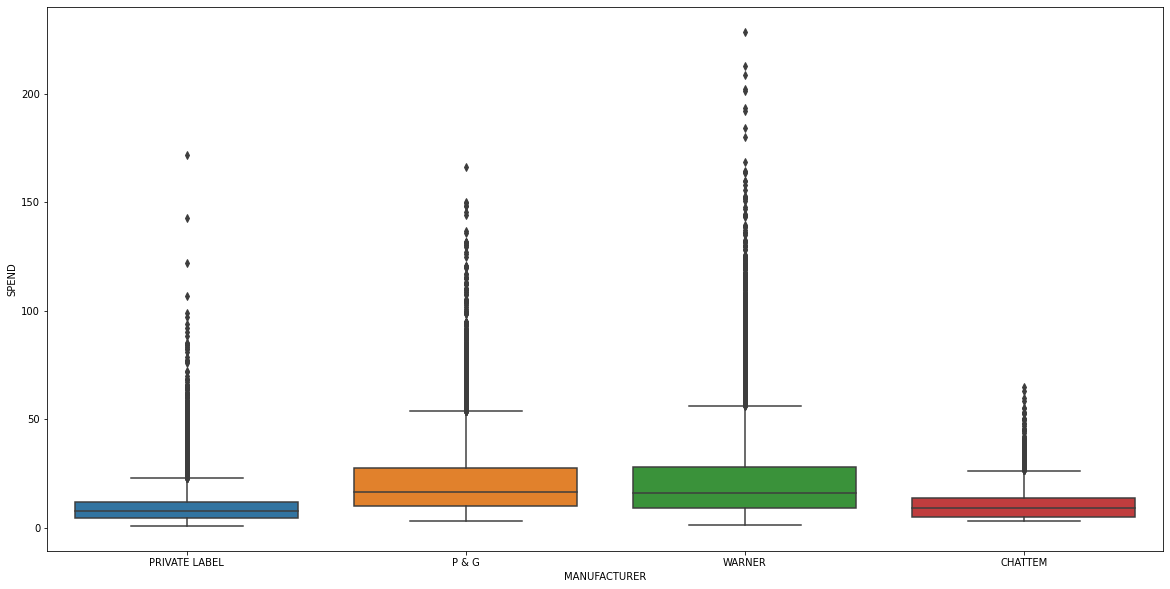

In [ ]:
#WARNER and P&G having same mean and similar IQR of spend with WARNER having the most outlier spends
sns.boxplot(x = mouth_df2.MANUFACTURER, y = mouth_df2.SPEND)

In [ ]:
#{'CHATTEM', 'P & G', 'PRIVATE LABEL', 'WARNER'} are brands for 'MOUTHWASHES (ANTISEPTIC)'

mouth_chat2 = mouth_df2.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['CHATTEM']
mouth_chat2.reset_index(inplace = True)
mouth_chat2.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

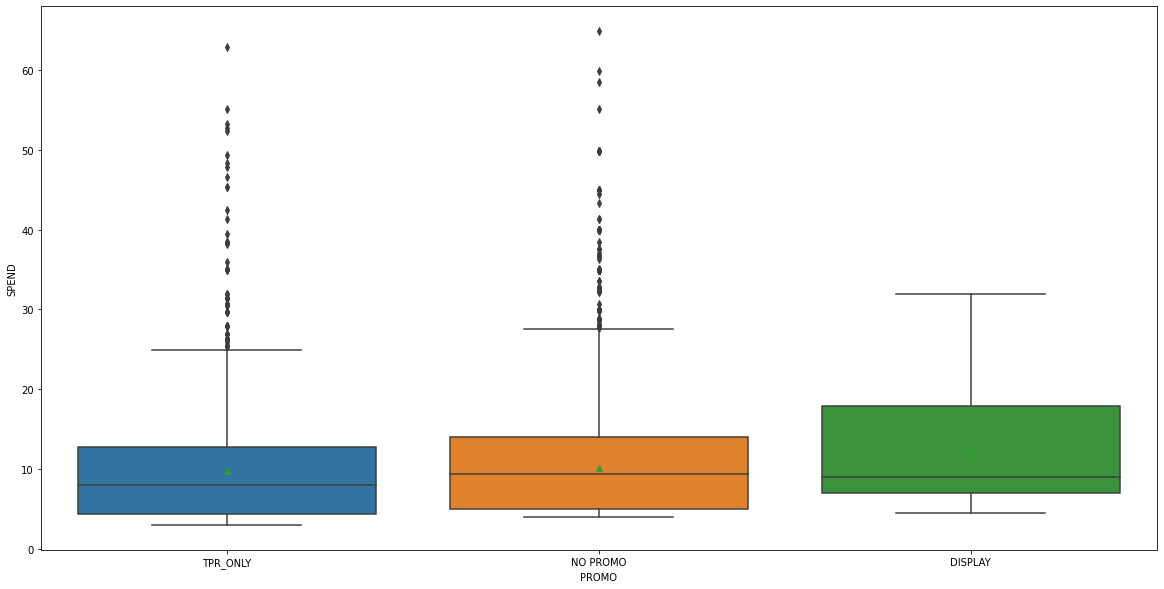

In [ ]:
#Variation of the sales for 'MOUTHWASHES (ANTISEPTIC)' OF 'CHATTEM' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'CHATTEM') & (df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)')].SPEND, x=df[(df.MANUFACTURER == 'CHATTEM') & (df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)')].PROMO, showmeans=True)

In [ ]:
mouth_pg2 = mouth_df2.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['P & G']
mouth_pg2.reset_index(inplace = True)
mouth_pg2.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

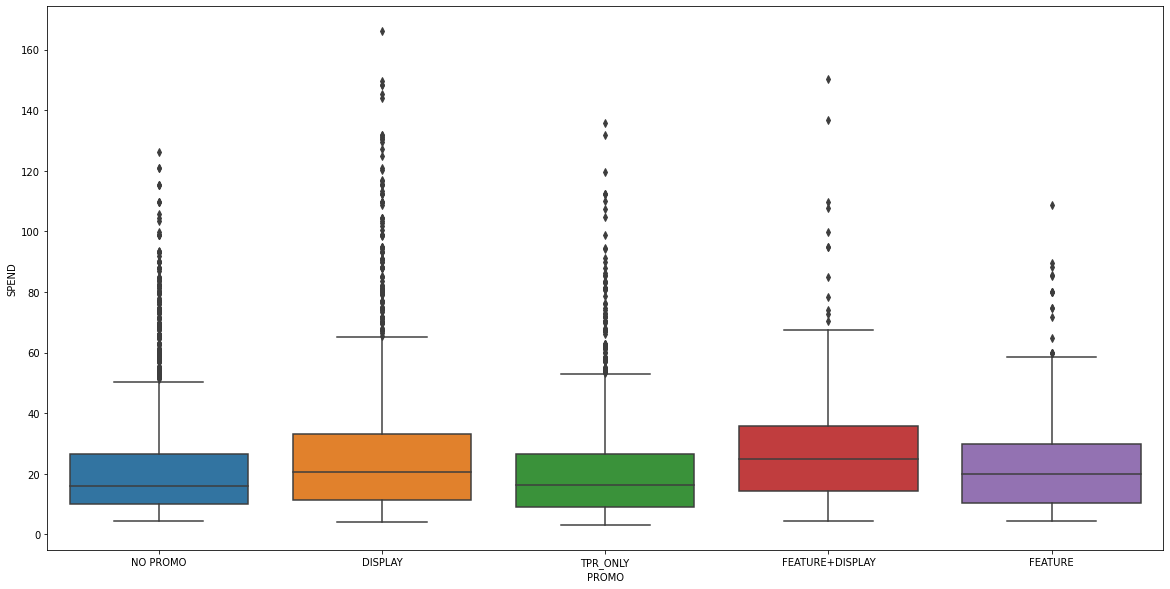

In [ ]:
#Variation of the sales for 'MOUTHWASHES (ANTISEPTIC)' OF 'P & G' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'P & G') & (df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)')].SPEND, x=df[(df.MANUFACTURER == 'P & G') & (df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)')].PROMO)

In [ ]:
mouth_private = mouth_df2.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['PRIVATE LABEL']
mouth_private.reset_index(inplace = True)
mouth_private.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

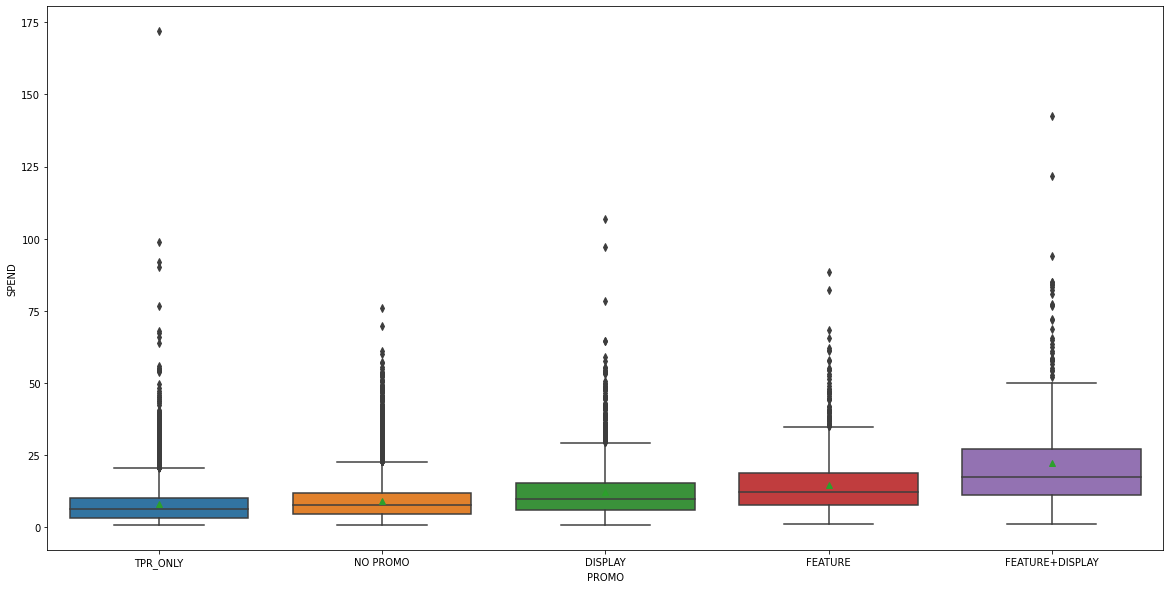

In [ ]:
#Variation of the sales for 'MOUTHWASHES (ANTISEPTIC)' OF 'PRIVATE LABEL' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)')].SPEND, x=df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)')].PROMO,  showmeans=True)

In [ ]:
mouth_warn = mouth_df2.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['WARNER']
mouth_warn.reset_index(inplace = True)
mouth_warn.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

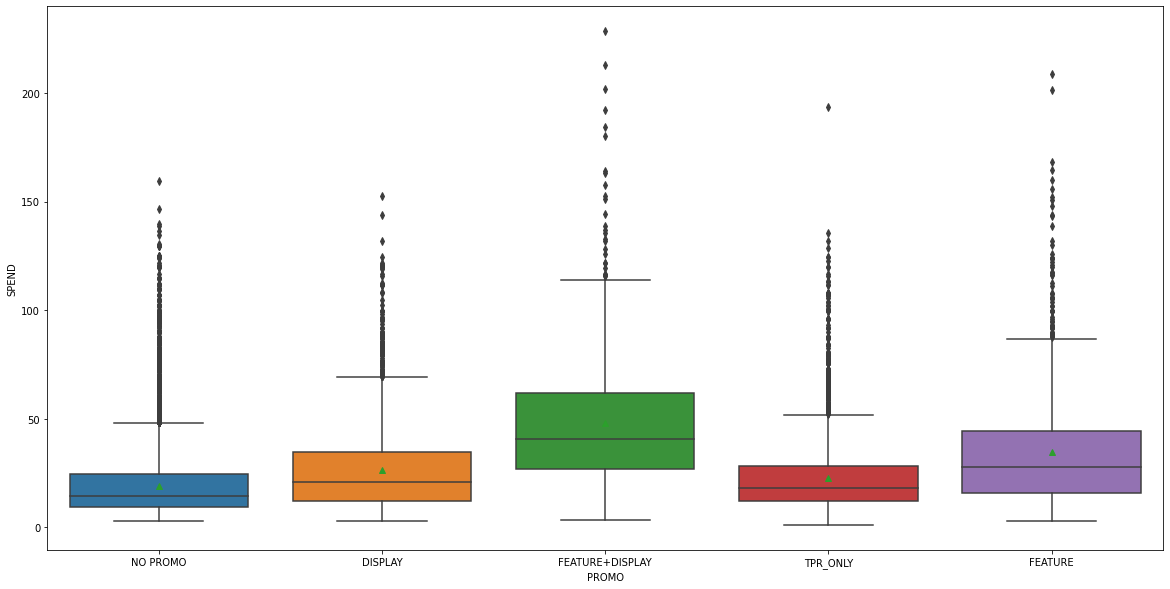

In [ ]:
#Variation of the sales for 'MOUTHWASHES (ANTISEPTIC)' OF 'WARNER' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'WARNER') & (df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)')].SPEND, x=df[(df.MANUFACTURER == 'WARNER') & (df.SUB_CATEGORY == 'MOUTHWASHES (ANTISEPTIC)')].PROMO,  showmeans=True)

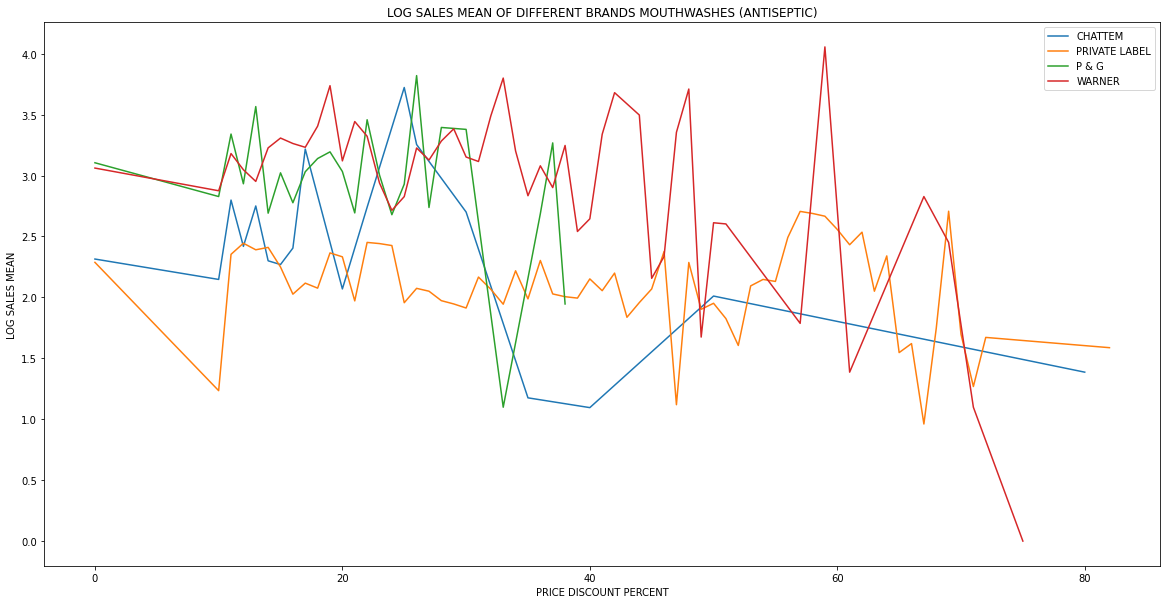

In [ ]:

fig, ax = plt.subplots()

ax.plot(mouth_chat2.discount, np.log(mouth_chat2.sales_mean), label = 'CHATTEM')
ax.plot(mouth_private.discount, np.log(mouth_private.sales_mean), label = 'PRIVATE LABEL')
ax.plot(mouth_pg2.discount, np.log(mouth_pg2.sales_mean), label = 'P & G')
ax.plot(mouth_warn.discount, np.log(mouth_warn.sales_mean), label = 'WARNER')
plt.title('LOG SALES MEAN OF DIFFERENT BRANDS MOUTHWASHES (ANTISEPTIC)')
plt.xlabel('PRICE DISCOUNT PERCENT')
plt.ylabel('LOG SALES MEAN')
plt.legend()

In [ ]:
#I will be Quantifying the results for a Category rather than specific subcategries
set(df.loc[df.CATEGORY == 'ORAL HYGIENE PRODUCTS', 'MANUFACTURER'])

{'CHATTEM', 'COLGATE', 'P & G', 'PRIVATE LABEL', 'WARNER'}

In [ ]:
#Quantifying results
table1 = PrettyTable()
table1.title = 'Summary Table:Category -->ORAL HYGIENE PRODUCTS'
table1.field_names = ['Parameter', 'Value']

x1 = df[(df.MANUFACTURER == 'CHATTEM') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x12 = df[(df.MANUFACTURER == 'COLGATE') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x13 = df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x14 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x15 = df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.mean()

y1 = df[(df.MANUFACTURER == 'CHATTEM') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y12 = df[(df.MANUFACTURER == 'COLGATE') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y13 = df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y14 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y15 = df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()

y23 = df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y24 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y25 = df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()

y33 = df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE')].SPEND.mean()
y34 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE')].SPEND.mean()
y35 = df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE')].SPEND.mean()

y4 = df[(df.MANUFACTURER == 'CHATTEM') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y43 = df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y44 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y45 = df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'DISPLAY')].SPEND.mean()

z1 = df[(df.MANUFACTURER == 'CHATTEM') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.std()
z12 = df[(df.MANUFACTURER == 'COLGATE') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.std()
z13 = df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.std()
z14 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.std()
z15 = df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'NO PROMO')].SPEND.std()

p1 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'CHATTEM') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND, x1+3*z1, kind='mean'))
p12 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'COLGATE') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND, x12+3*z12, kind='mean'))
p13 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND, x13+3*z13, kind='mean'))
p14 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND, x14+3*z14, kind='mean'))
p15 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'TPR_ONLY')].SPEND, x15+3*z15, kind='mean'))

p23 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE')].SPEND, x13+3*z13, kind='mean'))
p24 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE')].SPEND, x14+3*z14, kind='mean'))
p25 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE')].SPEND, x15+3*z15, kind='mean'))

p3 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'CHATTEM') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'DISPLAY')].SPEND, x1+3*z1, kind='mean'))
p33 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'DISPLAY')].SPEND, x13+3*z13, kind='mean'))
p34 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'DISPLAY')].SPEND, x14+3*z14, kind='mean'))
p35 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'DISPLAY')].SPEND, x15+3*z15, kind='mean'))

p43 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'P & G') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x13+3*z13, kind='mean'))
p44 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x14+3*z14, kind='mean'))
p45 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'WARNER') & (df.CATEGORY == 'ORAL HYGIENE PRODUCTS') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x15+3*z15, kind='mean'))

table1.add_row(['---------------------------TPR_ONLY VS NO PROMO------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of CHATTEM ORAL HYGIENE PRODUCTS:TPR_ONLY Vs NO PROMO--->', round(y1/x1, 2)])
table1.add_row(['Ratio Of Mean Sales Of COLGATE ORAL HYGIENE PRODUCTS:TPR_ONLY Vs NO PROMO--->', round(y12/x12, 2)])
table1.add_row(['Ratio Of Mean Sales Of P & G ORAL HYGIENE PRODUCTS:TPR_ONLY Vs NO PROMO--->', round(y13/x13, 2)])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL ORAL HYGIENE PRODUCTS:TPR_ONLY Vs NO PROMO--->', round(y14/x14, 2)])
table1.add_row(['Ratio Of Mean Sales Of WARNER ORAL HYGIENE PRODUCTS:TPR_ONLY Vs NO PROMO--->', round(y15/x15, 2)])

table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of CHATTEM ORAL HYGIENE PRODUCTS:TPR_ONLY->', round(p1, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of COLGATE ORAL HYGIENE PRODUCTS:TPR_ONLY->', round(p12, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of P & G ORAL HYGIENE PRODUCTS:TPR_ONLY->', round(p13, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL ORAL HYGIENE PRODUCTS:TPR_ONLY->', round(p14, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of WARNER ORAL HYGIENE PRODUCTS:TPR_ONLY->', round(p15, 2)])
table1.add_row(['---------------------------FEATURE VS NO PROMO---------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of P & G ORAL HYGIENE PRODUCTS:FEATURE Vs NO PROMO--->', round(y33/x13, 2)])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL ORAL HYGIENE PRODUCTS:FEATURE Vs NO PROMO--->', round(y34/x14, 2)])
table1.add_row(['Ratio Of Mean Sales Of WARNER ORAL HYGIENE PRODUCTS:FEATURE Vs NO PROMO--->', round(y35/x15, 2)])

table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of P & G ORAL HYGIENE PRODUCTS:FEATURE->', round(p23, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL ORAL HYGIENE PRODUCTS:FEATURE->', round(p24, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of WARNER ORAL HYGIENE PRODUCTS:FEATURE->', round(p25, 2)])
table1.add_row(['---------------------------DISPLAY VS NO PROMO-------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of CHATTEM ORAL HYGIENE PRODUCTS:DISPLAY Vs NO PROMO--->', round(y4/x1, 2)])
table1.add_row(['Ratio Of Mean Sales Of P & G ORAL HYGIENE PRODUCTS:DISPLAY Vs NO PROMO--->', round(y43/x13, 2)])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL ORAL HYGIENE PRODUCTS:DISPLAY Vs NO PROMO--->', round(y44/x14, 2)])
table1.add_row(['Ratio Of Mean Sales Of WARNER ORAL HYGIENE PRODUCTS:DISPLAY Vs NO PROMO--->', round(y45/x15, 2)])

table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of CHATTEM ORAL HYGIENE PRODUCTS:DISPLAY->', round(p3, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of P & G ORAL HYGIENE PRODUCTS:DISPLAY->', round(p33, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL ORAL HYGIENE PRODUCTS:DISPLAY->', round(p34, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of WARNER ORAL HYGIENE PRODUCTS:DISPLAY->', round(p35, 2)])
table1.add_row(['---------------------------FEATURE+DISPLAY VS NO PROMO---------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of P & G ORAL HYGIENE PRODUCTS:FEATURE+DISPLAY Vs NO PROMO--->', round(y23/x13, 2)])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL ORAL HYGIENE PRODUCTS:FEATURE+DISPLAY Vs NO PROMO--->', round(y24/x14, 2)])
table1.add_row(['Ratio Of Mean Sales Of WARNER ORAL HYGIENE PRODUCTS:FEATURE+DISPLAY Vs NO PROMO--->', round(y25/x15, 2)])

table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of P & G ORAL HYGIENE PRODUCTS:FEATURE+DISPLAY->', round(p43, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL ORAL HYGIENE PRODUCTS:FEATURE+DISPLAY->', round(p44, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of WARNER ORAL HYGIENE PRODUCTS:FEATURE+DISPLAY->', round(p45, 2)])
table1.align["Parameter"] = "l"
table1.align["Value"] = "l"
print(table1)

+----------------------------------------------------------------------------------------------------------------+
|                                Summary Table:Category -->ORAL HYGIENE PRODUCTS                                 |
+--------------------------------------------------------------------------------------------------------+-------+
| Parameter                                                                                              | Value |
+--------------------------------------------------------------------------------------------------------+-------+
| ---------------------------TPR_ONLY VS NO PROMO------------------------                                | ---   |
| Ratio Of Mean Sales Of CHATTEM ORAL HYGIENE PRODUCTS:TPR_ONLY Vs NO PROMO--->                          | 1.03  |
| Ratio Of Mean Sales Of COLGATE ORAL HYGIENE PRODUCTS:TPR_ONLY Vs NO PROMO--->                          | 0.77  |
| Ratio Of Mean Sales Of P & G ORAL HYGIENE PRODUCTS:TPR_ONLY Vs NO PROMO--->   

In [ ]:
#From above we can see that in the TPR_ONLY Promotional category WARNER ORAL HYGIENE PRODUCTS wins with a mean ratio 
#of 1.19 and Outlier Sales of 3%

In [ ]:
#From above we can see that in the FEATURE Promotional category WARNER ORAL HYGIENE PRODUCTS again wins with a mean
#ratio of 1.82 and Outlier Sales of 10%

In [ ]:
#From above we can see that in the DISPLAY Promotional category P&G ORAL HYGIENE PRODUCTS again wins with a mean
#ratio of 1.58 and Outlier Sales of 6.5%

In [ ]:
#From above we can see that in the FEATURE+DISPLAY Promotional category WARNER ORAL HYGIENE PRODUCTS again wins
#with a mean ratio of 2.52 and Outlier Sales of 21%

In [ ]:
#Conclusion: If I were to sell ORAL HYGIENE PRODUCTS , IT would be of WANER and Promotional type would be 
#FEATURE+DISPLAY

In [ ]:
#Now lets go to category 'COLD CEREAL'

In [ ]:
#There are 3 subcategories in 'COLD CEREAL', we'll go through them one by one
set(df.loc[df.CATEGORY == 'COLD CEREAL', 'SUB_CATEGORY'])

{'ADULT CEREAL', 'ALL FAMILY CEREAL', 'KIDS CEREAL'}

In [ ]:
#lets make 3 dataframes for 3 sub_categories
crl_df1 = df.loc[df.SUB_CATEGORY == 'ADULT CEREAL', ['MANUFACTURER', 'PER_DISCOUNT', 'SPEND']]
crl_df2 = df.loc[df.SUB_CATEGORY == 'ALL FAMILY CEREAL', ['MANUFACTURER', 'PER_DISCOUNT', 'SPEND']]
crl_df3 = df.loc[df.SUB_CATEGORY == 'KIDS CEREAL', ['MANUFACTURER', 'PER_DISCOUNT', 'SPEND']]

In [ ]:
#What companies are in 'ADULT CEREAL'
set(crl_df1.MANUFACTURER)

{'POST FOODS', 'PRIVATE LABEL'}

<AxesSubplot:xlabel='MANUFACTURER', ylabel='SPEND'>

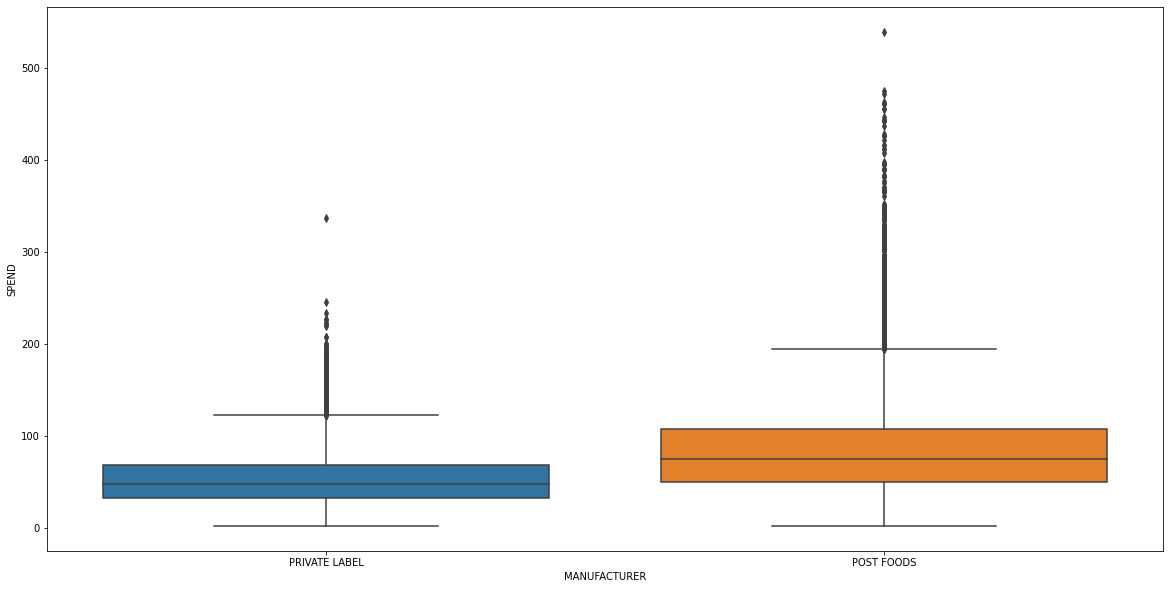

In [ ]:
sns.boxplot(x = crl_df1.MANUFACTURER, y= crl_df1.SPEND)

In [ ]:
#Lets find out the spend variations for POST FOODS, PRIVATE LABEL 
crl_post = crl_df1.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['POST FOODS']
crl_post.reset_index(inplace = True)
crl_post.columns = ['discount', 'sales_mean']

crl_private = crl_df1.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['PRIVATE LABEL']
crl_private.reset_index(inplace = True)
crl_private.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

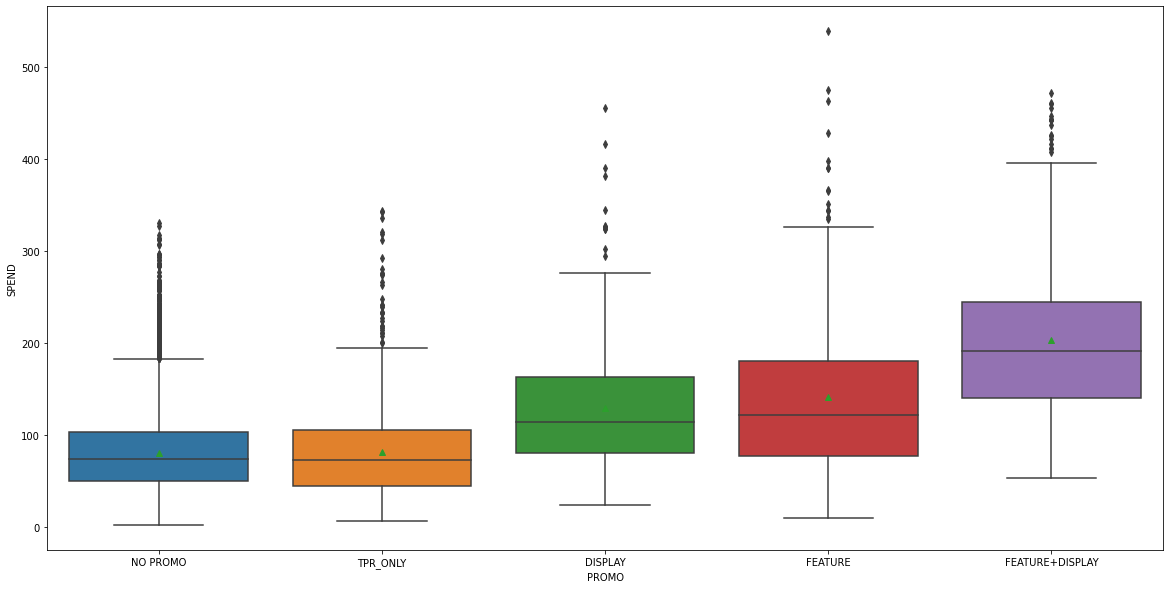

In [ ]:
#Variation of the sales for 'ADULT CEREAL' OF 'POST FOODS' on Various PROMOS

sns.boxplot(y = df[(df.MANUFACTURER == 'POST FOODS') & (df.SUB_CATEGORY == 'ADULT CEREAL')].SPEND, x=df[(df.MANUFACTURER == 'POST FOODS') & (df.SUB_CATEGORY == 'ADULT CEREAL')].PROMO,  showmeans=True)

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

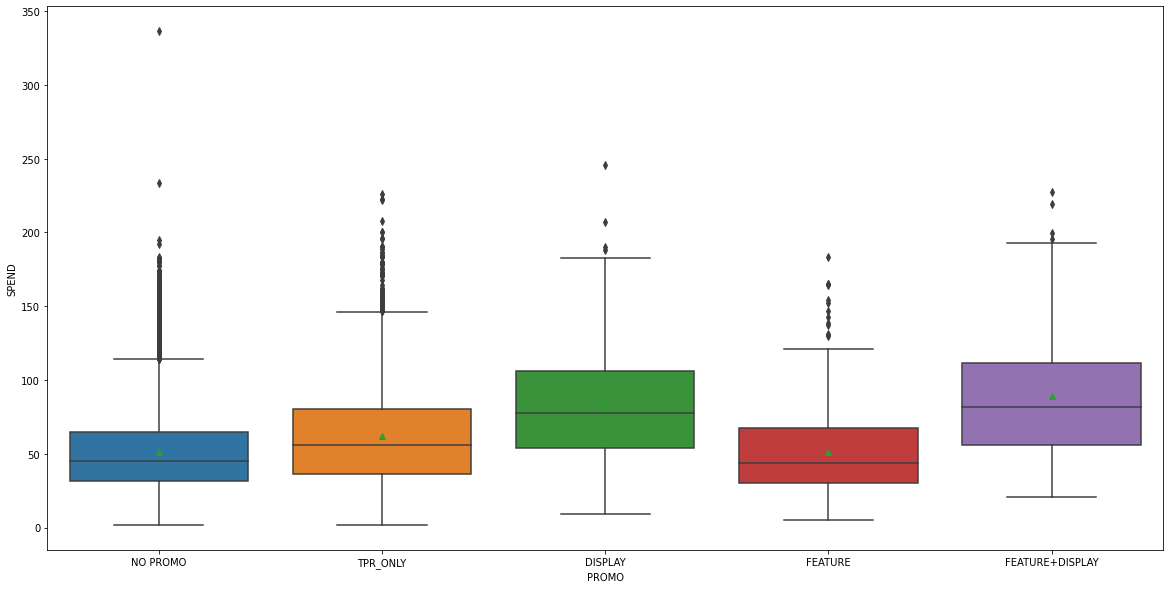

In [ ]:
#Variation of the sales for 'ADULT CEREAL' OF 'PRIVATE LABEL' on Various PROMO"S

sns.boxplot(y = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'ADULT CEREAL')].SPEND, x=df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'ADULT CEREAL')].PROMO,  showmeans=True)

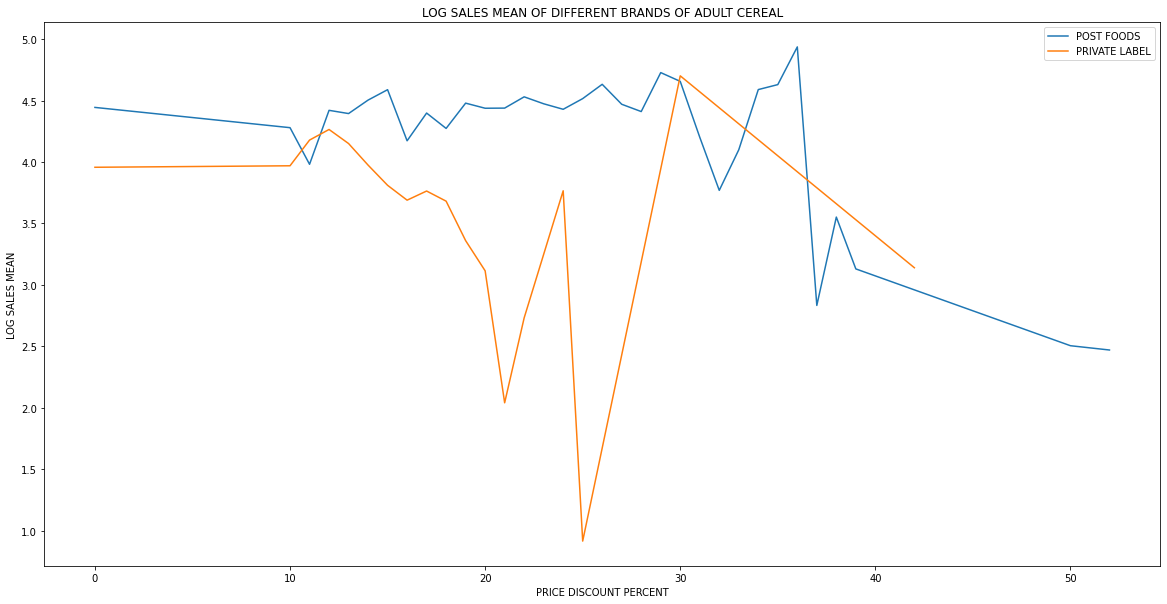

In [ ]:


fig, ax = plt.subplots()

ax.plot(crl_post.discount, np.log(crl_post.sales_mean), label = 'POST FOODS')
ax.plot(crl_private.discount, np.log(crl_private.sales_mean), label = 'PRIVATE LABEL')
plt.title('LOG SALES MEAN OF DIFFERENT BRANDS OF ADULT CEREAL')
plt.xlabel('PRICE DISCOUNT PERCENT')
plt.ylabel('LOG SALES MEAN')
plt.legend()

<AxesSubplot:xlabel='MANUFACTURER', ylabel='SPEND'>

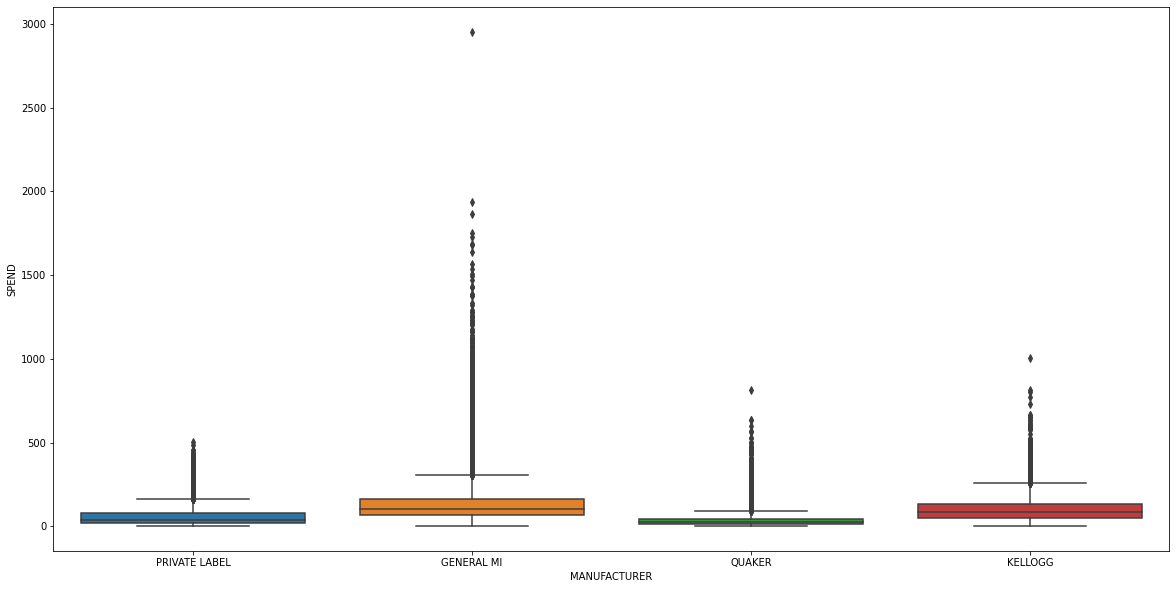

In [ ]:
sns.boxplot(x = crl_df2.MANUFACTURER, y= crl_df2.SPEND)

In [ ]:
#What companies are in 'ALL FAMILY CEREAL'
set(df.loc[df.SUB_CATEGORY == 'ALL FAMILY CEREAL', 'MANUFACTURER'])

{'GENERAL MI', 'KELLOGG', 'PRIVATE LABEL', 'QUAKER'}

In [ ]:
#Lets find out the spend variations for 'GENERAL MI', 'KELLOGG', PRIVATE LABEL, 'QUAKER' in year 2010

crl_gen = crl_df2.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['GENERAL MI']
crl_gen.reset_index(inplace = True)
crl_gen.columns = ['discount', 'sales_mean']

crl_kel = crl_df2.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['KELLOGG']
crl_kel.reset_index(inplace = True)
crl_kel.columns = ['discount', 'sales_mean']

crl_private2 = crl_df2.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['PRIVATE LABEL']
crl_private2.reset_index(inplace = True)
crl_private2.columns = ['discount', 'sales_mean']

crl_quak = crl_df2.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['QUAKER']
crl_quak.reset_index(inplace = True)
crl_quak.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

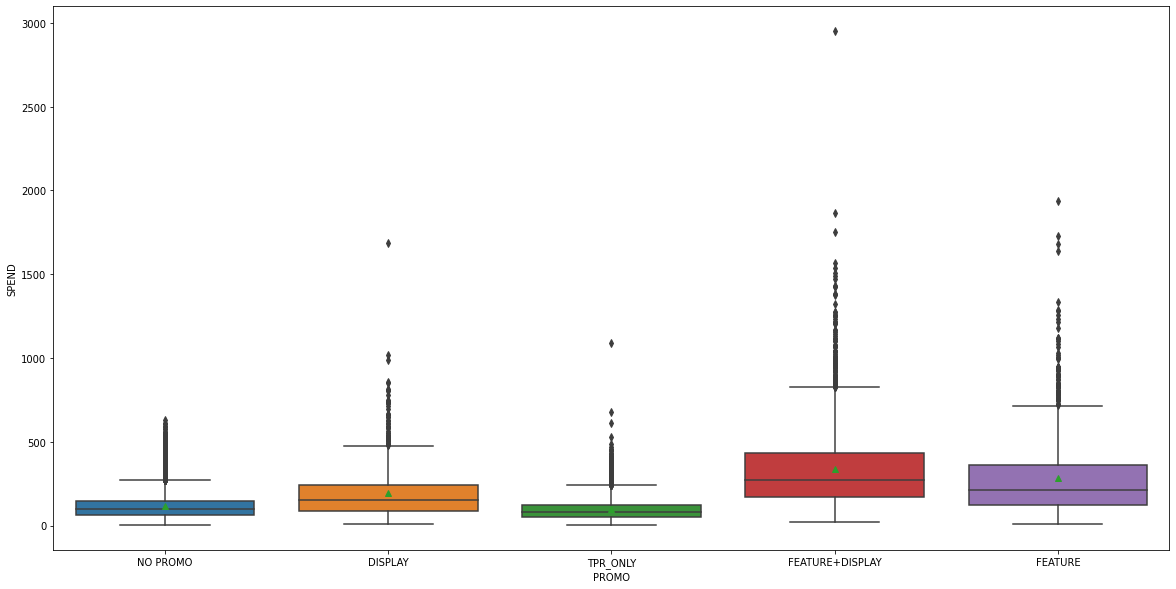

In [ ]:
#Variation of the sales for 'ALL FAMILY CEREAL' OF 'GENERAL MI' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'GENERAL MI') & (df.SUB_CATEGORY == 'ALL FAMILY CEREAL')].SPEND, x=df[(df.MANUFACTURER == 'GENERAL MI') & (df.SUB_CATEGORY == 'ALL FAMILY CEREAL')].PROMO,  showmeans=True)

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

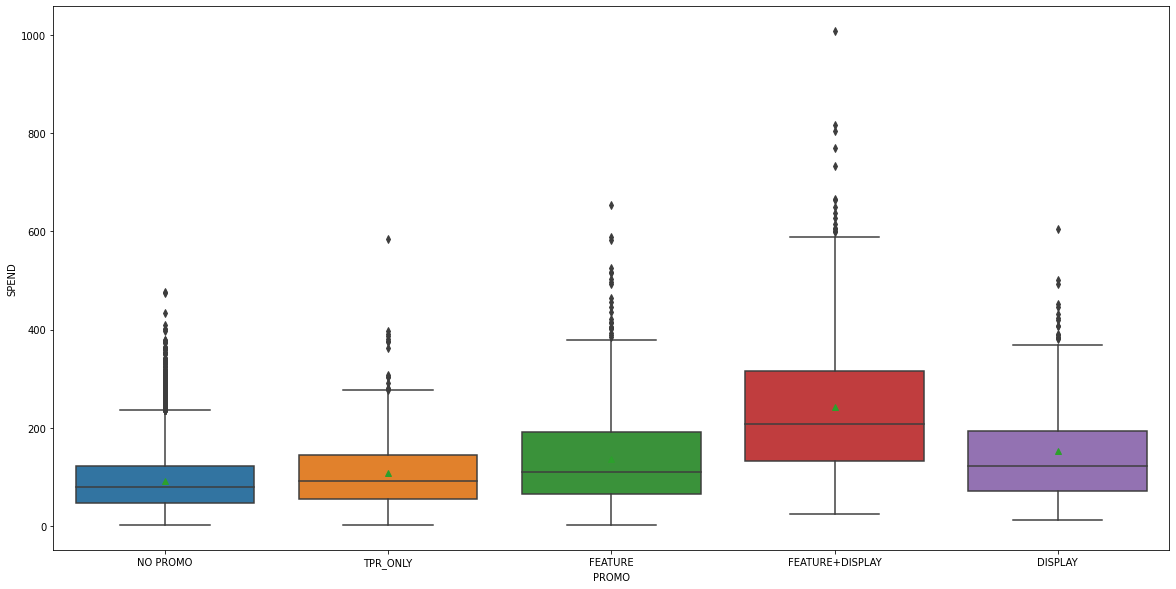

In [ ]:
#Variation of the sales for 'ALL FAMILY CEREAL' OF 'KELLOGG' on Various PROMOS

sns.boxplot(y = df[(df.MANUFACTURER == 'KELLOGG') & (df.SUB_CATEGORY == 'ALL FAMILY CEREAL')].SPEND, x=df[(df.MANUFACTURER == 'KELLOGG') & (df.SUB_CATEGORY == 'ALL FAMILY CEREAL')].PROMO,  showmeans=True)

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

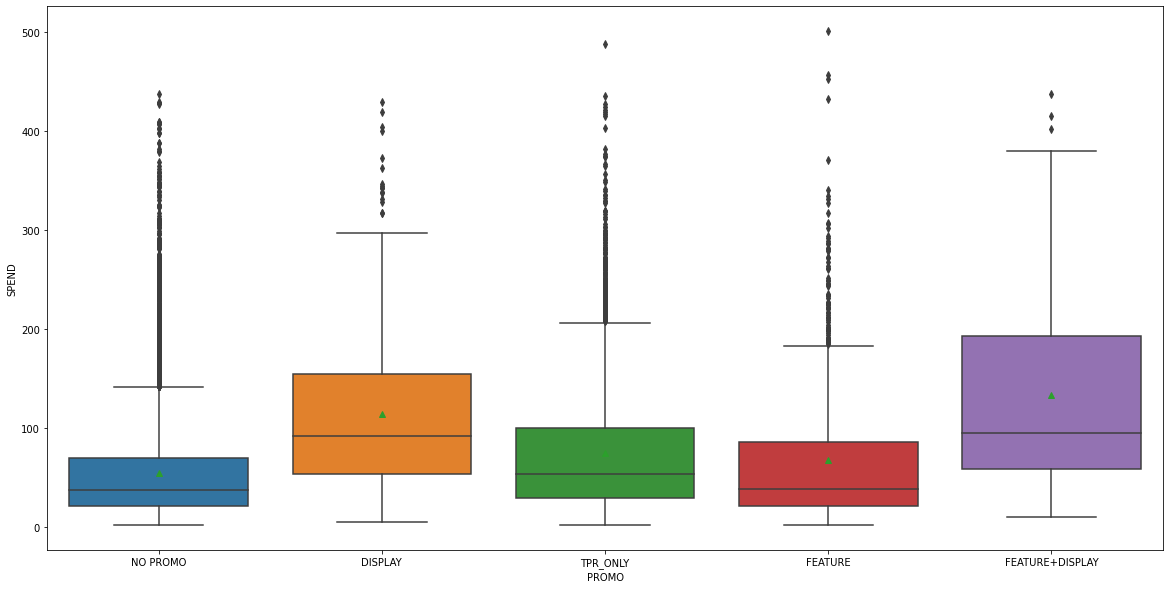

In [ ]:
#Variation of the sales for 'ALL FAMILY CEREAL' OF 'PRIVATE LABEL' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'ALL FAMILY CEREAL')].SPEND, x=df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.SUB_CATEGORY == 'ALL FAMILY CEREAL')].PROMO,  showmeans=True)

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

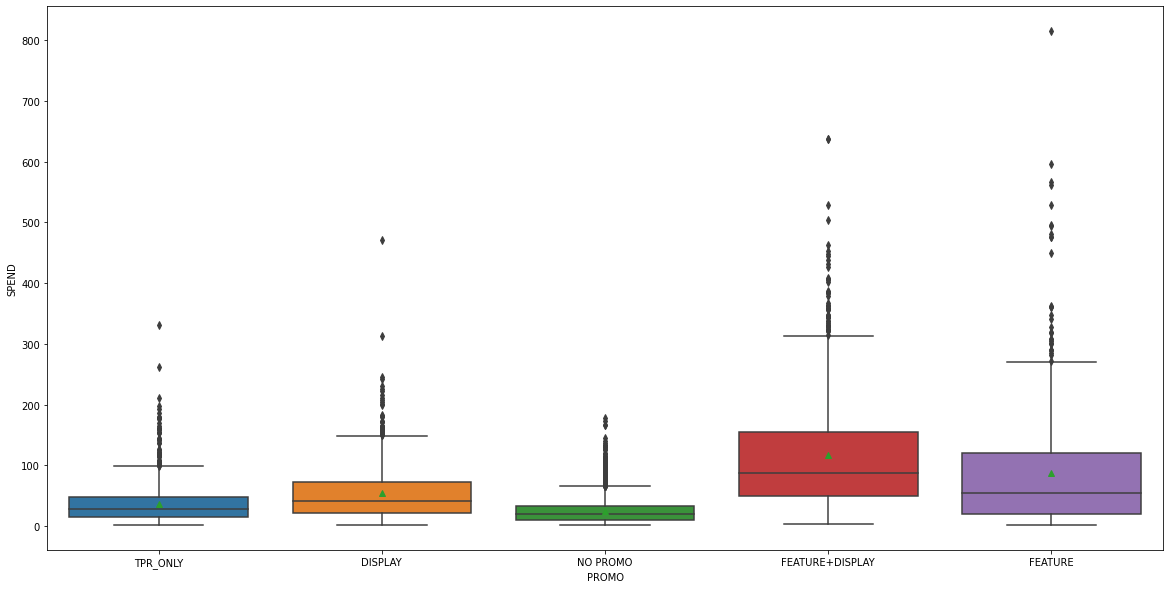

In [ ]:
#Variation of the sales for 'ALL FAMILY CEREAL' OF 'QUAKER' on VArious PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'QUAKER') & (df.SUB_CATEGORY == 'ALL FAMILY CEREAL')].SPEND, x=df[(df.MANUFACTURER == 'QUAKER') & (df.SUB_CATEGORY == 'ALL FAMILY CEREAL')].PROMO,  showmeans=True)

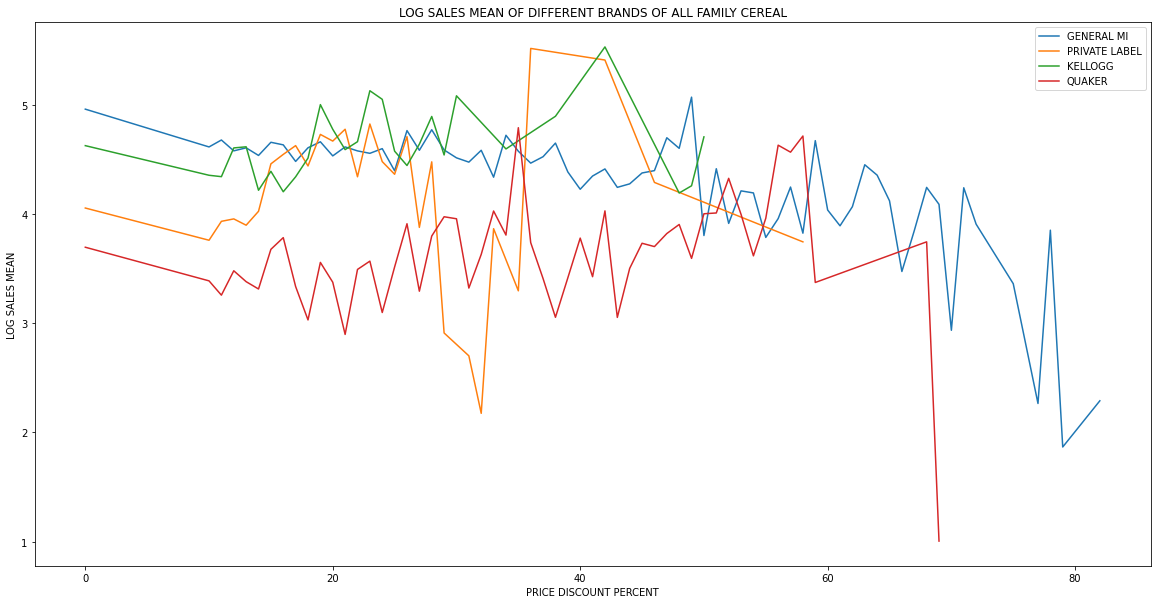

In [ ]:


fig, ax = plt.subplots()

ax.plot(crl_gen.discount, np.log(crl_gen.sales_mean), label = 'GENERAL MI')
ax.plot(crl_private2.discount, np.log(crl_private2.sales_mean), label = 'PRIVATE LABEL')
ax.plot(crl_kel.discount, np.log(crl_kel.sales_mean), label = 'KELLOGG')
ax.plot(crl_quak.discount, np.log(crl_quak.sales_mean), label = 'QUAKER')
plt.title('LOG SALES MEAN OF DIFFERENT BRANDS OF ALL FAMILY CEREAL')
plt.xlabel('PRICE DISCOUNT PERCENT')
plt.ylabel('LOG SALES MEAN')
plt.legend()

<AxesSubplot:xlabel='MANUFACTURER', ylabel='SPEND'>

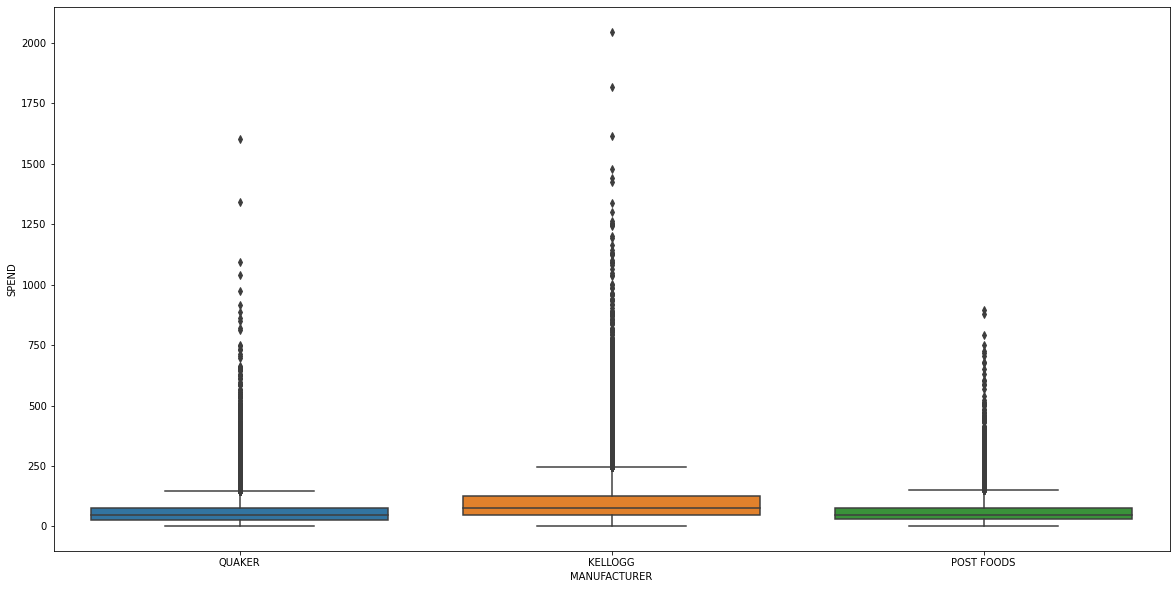

In [ ]:
#Almost similar mean spends in all 3 but KELLOGG having the widest distribution of spends and IQR and having the most
#Outliers
sns.boxplot(x = crl_df3.MANUFACTURER, y= crl_df3.SPEND)

In [ ]:
#What companies are in 'KIDS CEREAL'
set(df.loc[df.SUB_CATEGORY == 'KIDS CEREAL', 'MANUFACTURER'])

{'KELLOGG', 'POST FOODS', 'QUAKER'}

In [ ]:
#Lets find out the spend variations for 'KELLOGG', 'POST FOODS', 'QUAKER'


crl_kel2 = crl_df3.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['KELLOGG']
crl_kel2.reset_index(inplace = True)
crl_kel2.columns = ['discount', 'sales_mean']

crl_post2 = crl_df3.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['POST FOODS']
crl_post2.reset_index(inplace = True)
crl_post2.columns = ['discount', 'sales_mean']

crl_quak2 = crl_df3.groupby(['MANUFACTURER', 'PER_DISCOUNT']).agg(['mean']).loc['QUAKER']
crl_quak2.reset_index(inplace = True)
crl_quak2.columns = ['discount', 'sales_mean']

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

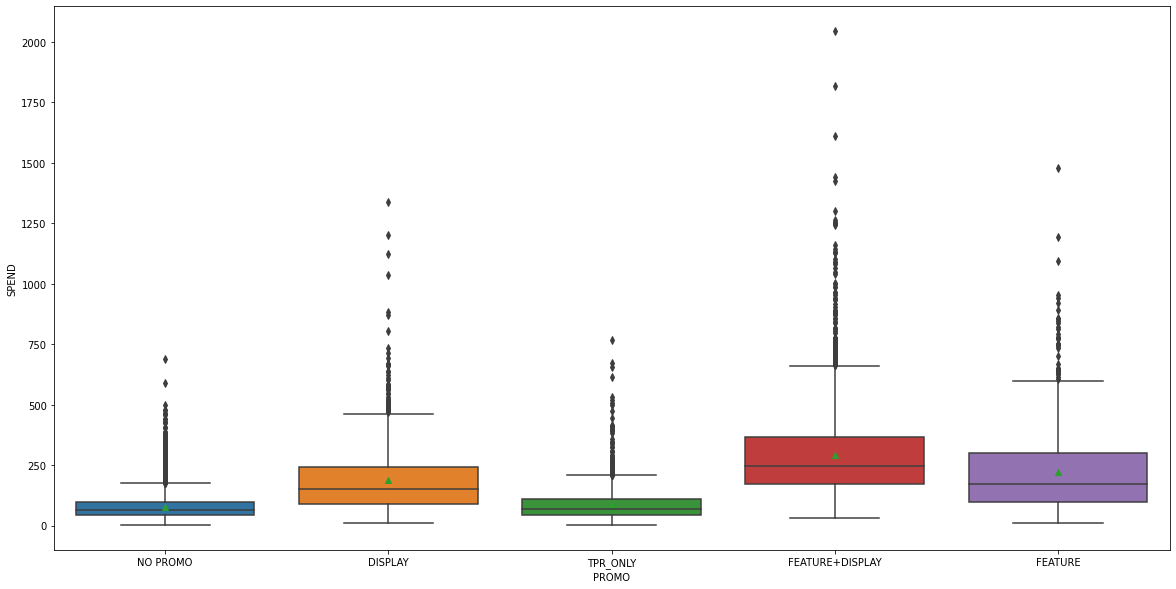

In [ ]:
#Variation of the sales for 'KIDS CEREAL' OF 'KELLOGG' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'KELLOGG') & (df.SUB_CATEGORY == 'KIDS CEREAL')].SPEND, x=df[(df.MANUFACTURER == 'KELLOGG') & (df.SUB_CATEGORY == 'KIDS CEREAL')].PROMO,  showmeans=True)

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

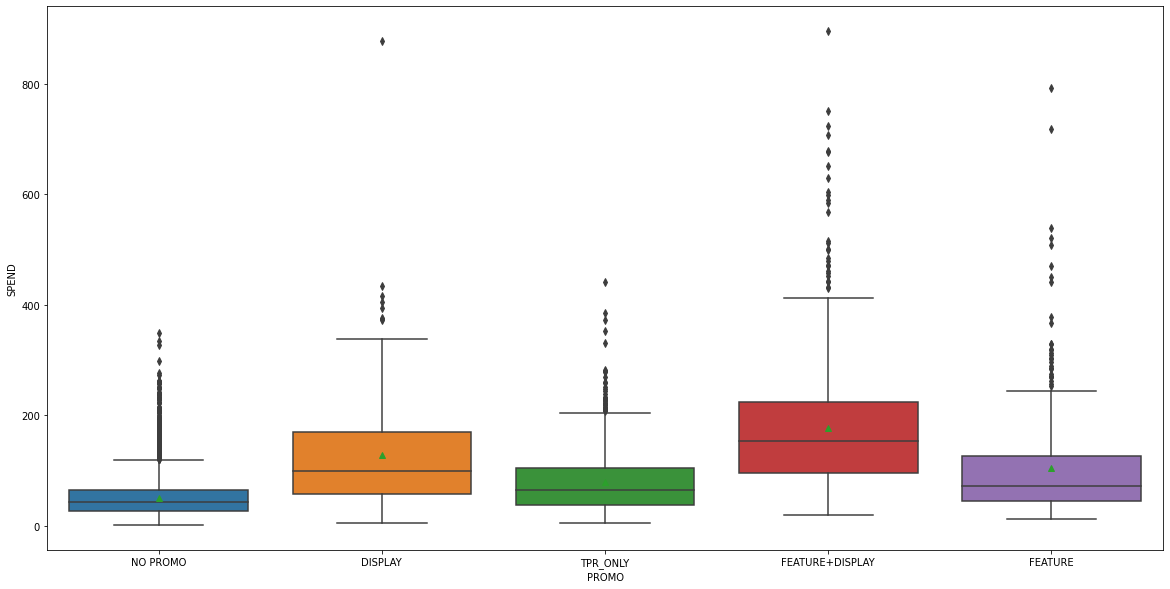

In [ ]:
#Variation of the sales for 'KIDS CEREAL' OF 'POST FOODS' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'POST FOODS') & (df.SUB_CATEGORY == 'KIDS CEREAL')].SPEND, x=df[(df.MANUFACTURER == 'POST FOODS') & (df.SUB_CATEGORY == 'KIDS CEREAL')].PROMO,  showmeans=True)

<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

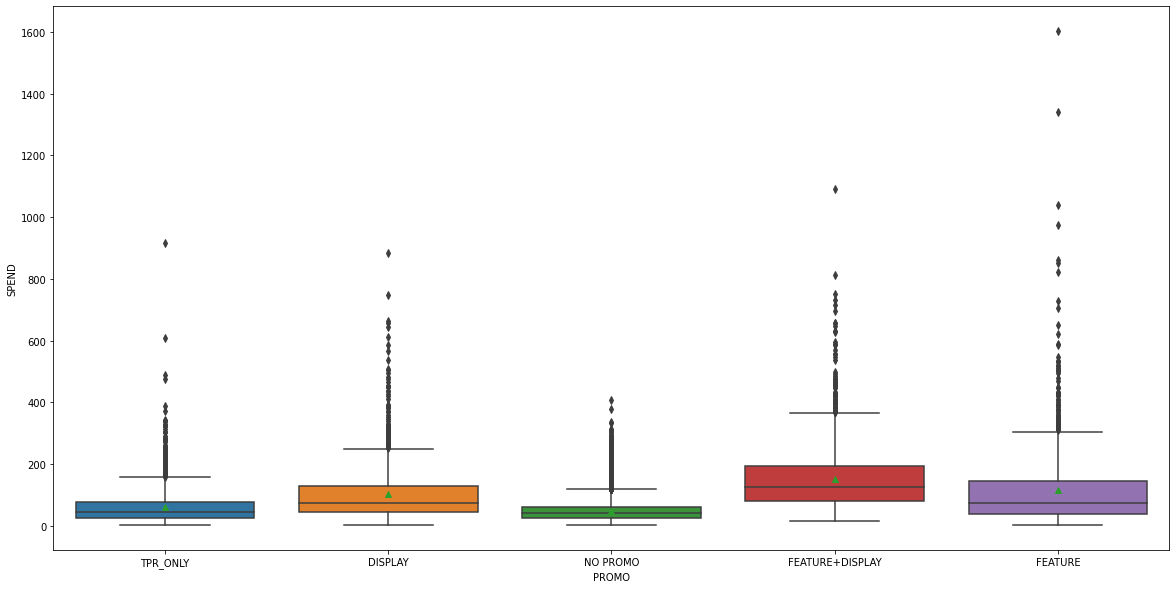

In [ ]:
#Variation of the sales for 'KIDS CEREAL' OF 'QUAKER' on Various PROMO's

sns.boxplot(y = df[(df.MANUFACTURER == 'QUAKER') & (df.SUB_CATEGORY == 'KIDS CEREAL')].SPEND, x=df[(df.MANUFACTURER == 'QUAKER') & (df.SUB_CATEGORY == 'KIDS CEREAL')].PROMO,  showmeans=True)

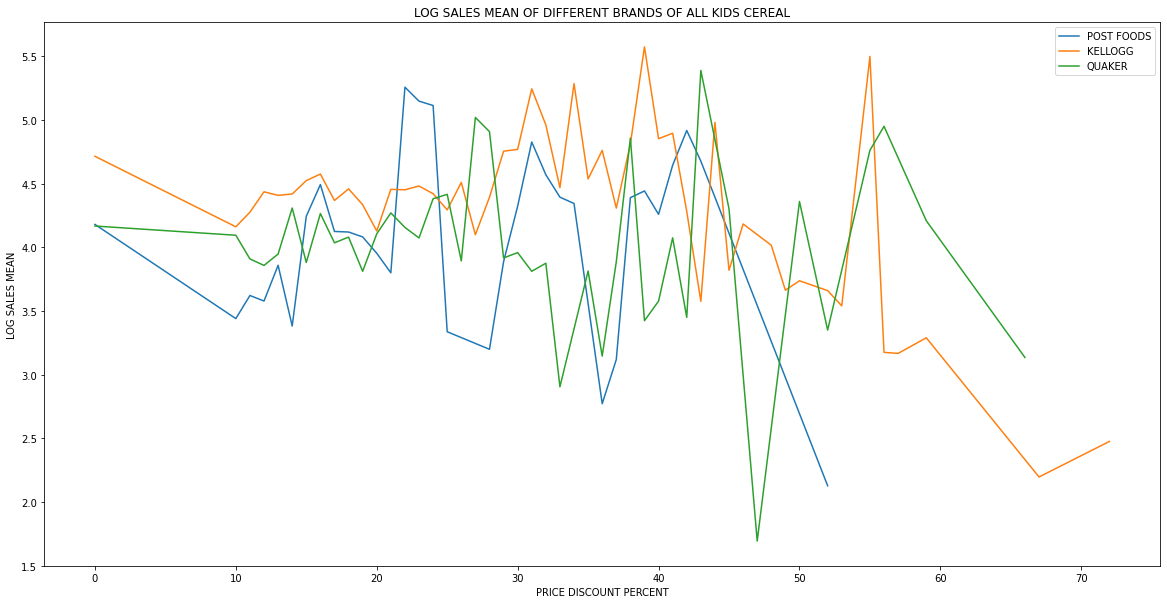

In [ ]:

fig, ax = plt.subplots()

ax.plot(crl_post2.discount, np.log(crl_post2.sales_mean), label = 'POST FOODS')
ax.plot(crl_kel2.discount, np.log(crl_kel2.sales_mean), label = 'KELLOGG')
ax.plot(crl_quak2.discount, np.log(crl_quak2.sales_mean), label = 'QUAKER')
plt.title('LOG SALES MEAN OF DIFFERENT BRANDS OF ALL KIDS CEREAL')
plt.xlabel('PRICE DISCOUNT PERCENT')
plt.ylabel('LOG SALES MEAN')
plt.legend()

In [ ]:
#We will Quantify the results for 'COLD CEREAL' Category and not the whole Subcategories

In [ ]:
#5 companies in this category
set(df.loc[df.CATEGORY == 'COLD CEREAL', 'MANUFACTURER'])

{'GENERAL MI', 'KELLOGG', 'POST FOODS', 'PRIVATE LABEL', 'QUAKER'}

In [ ]:
#Quantifying results
table1 = PrettyTable()
table1.title = 'Summary Table:Category -->COLD CEREAL'
table1.field_names = ['Parameter', 'Value']

x1 = df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x12 = df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x13 = df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x14 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.mean()
x15 = df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.mean()

y1 = df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y12 = df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y13 = df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y14 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()
y15 = df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND.mean()

y2 = df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y22 = df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y23 = df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y24 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()
y25 = df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND.mean()

y3 = df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND.mean()
y32 = df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND.mean()
y33 = df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND.mean()
y34 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND.mean()
y35 = df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND.mean()

y4 = df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y42 = df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y43 = df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y44 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND.mean()
y45 = df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND.mean()

z1 = df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.std()
z12 = df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.std()
z13 = df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.std()
z14 = df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.std()
z15 = df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'NO PROMO')].SPEND.std()

p1 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND, x1+3*z1, kind='mean'))
p12 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND, x12+3*z12, kind='mean'))
p13 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND, x13+3*z13, kind='mean'))
p14 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND, x14+3*z14, kind='mean'))
p15 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'TPR_ONLY')].SPEND, x15+3*z15, kind='mean'))

p2 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND, x1+3*z1, kind='mean'))
p22 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND, x12+3*z12, kind='mean'))
p23 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND, x13+3*z13, kind='mean'))
p24 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND, x14+3*z14, kind='mean'))
p25 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE')].SPEND, x15+3*z15, kind='mean'))

p3 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND, x1+3*z1, kind='mean'))
p32 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND, x12+3*z12, kind='mean'))
p33 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND, x13+3*z13, kind='mean'))
p34 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND, x14+3*z14, kind='mean'))
p35 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'DISPLAY')].SPEND, x15+3*z15, kind='mean'))

p4 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'GENERAL MI') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x1+3*z1, kind='mean'))
p42 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'KELLOGG') & (df.CATEGORY =='COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x12+3*z12, kind='mean'))
p43 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'POST FOODS') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x13+3*z13, kind='mean'))
p44 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'PRIVATE LABEL') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x14+3*z14, kind='mean'))
p45 = (100 - stats.percentileofscore(df[(df.MANUFACTURER == 'QUAKER') & (df.CATEGORY == 'COLD CEREAL') & (df.PROMO == 'FEATURE+DISPLAY')].SPEND, x15+3*z15, kind='mean'))

table1.add_row(['---------------------------TPR_ONLY VS NO PROMO------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of GENERAL MI COLD CEREAL:TPR_ONLY Vs NO PROMO--->', round(y1/x1, 2)])
table1.add_row(['Ratio Of Mean Sales Of KELLOGG COLD CEREAL:TPR_ONLY Vs NO PROMO--->', round(y12/x12, 2)])
table1.add_row(['Ratio Of Mean Sales Of POST FOODS COLD CEREAL:TPR_ONLY Vs NO PROMO--->', round(y13/x13, 2)])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL COLD CEREAL:TPR_ONLY Vs NO PROMO--->', round(y14/x14, 2)])
table1.add_row(['Ratio Of Mean Sales Of QUAKER COLD CEREAL:TPR_ONLY Vs NO PROMO--->', round(y15/x15, 2)])

table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of GENERAL MI COLD CEREAL:TPR_ONLY->', round(p1, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of KELLOGG COLD CEREAL:TPR_ONLY->', round(p12, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of POST FOODS COLD CEREAL:TPR_ONLY->', round(p13, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL COLD CEREAL:TPR_ONLY->', round(p14, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of QUAKER COLD CEREAL:TPR_ONLY->', round(p15, 2)])
table1.add_row(['---------------------------FEATURE VS NO PROMO---------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of GENERAL MI COLD CEREAL:FEATURE Vs NO PROMO--->', round(y3/x1, 2)])
table1.add_row(['Ratio Of Mean Sales Of KELLOGG COLD CEREAL:FEATURE Vs NO PROMO--->', round(y32/x12, 2)])
table1.add_row(['Ratio Of Mean Sales Of POST FOODS COLD CEREAL:FEATURE Vs NO PROMO--->', round(y33/x13, 2)])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL COLD CEREAL:FEATURE Vs NO PROMO--->', round(y34/x14, 2)])
table1.add_row(['Ratio Of Mean Sales Of QUAKER COLD CEREAL:FEATURE Vs NO PROMO--->', round(y35/x15, 2)])

table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of GENERAL MI COLD CEREAL:FEATURE->', round(p2, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of KELLOGG COLD CEREAL:FEATURE->', round(p22, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of POST FOODS COLD CEREAL:FEATURE->', round(p23, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL COLD CEREAL:FEATURE->', round(p24, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of QUAKER COLD CEREAL:FEATURE->', round(p25, 2)])
table1.add_row(['---------------------------DISPLAY VS NO PROMO-------------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of GENERAL MI COLD CEREAL:DISPLAY Vs NO PROMO--->', round(y4/x1, 2)])
table1.add_row(['Ratio Of Mean Sales Of KELLOGG COLD CEREAL:DISPLAY Vs NO PROMO--->', round(y42/x12, 2)])
table1.add_row(['Ratio Of Mean Sales Of POST FOODS COLD CEREAL:DISPLAY Vs NO PROMO--->', round(y43/x13, 2)])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL COLD CEREAL:DISPLAY Vs NO PROMO--->', round(y44/x14, 2)])
table1.add_row(['Ratio Of Mean Sales Of QUAKER COLD CEREAL:DISPLAY Vs NO PROMO--->', round(y45/x15, 2)])

table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of GENERAL MI COLD CEREAL:DISPLAY->', round(p3, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of KELLOGG COLD CEREAL:DISPLAY->', round(p32, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of POST FOODS COLD CEREAL:DISPLAY->', round(p33, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL COLD CEREAL:DISPLAY->', round(p34, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of QUAKER COLD CEREAL:DISPLAY->', round(p35, 2)])
table1.add_row(['---------------------------FEATURE+DISPLAY VS NO PROMO---------------------', '---'])
table1.add_row(['Ratio Of Mean Sales Of GENERAL MI COLD CEREAL:FEATURE+DISPLAY Vs NO PROMO--->', round(y2/x1, 2)])
table1.add_row(['Ratio Of Mean Sales Of KELLOGG COLD CEREAL:FEATURE+DISPLAY Vs NO PROMO--->', round(y22/x12, 2)])
table1.add_row(['Ratio Of Mean Sales Of POST FOODS COLD CEREAL:FEATURE+DISPLAY Vs NO PROMO--->', round(y23/x13, 2)])
table1.add_row(['Ratio Of Mean Sales Of PRIVATE LABEL COLD CEREAL:FEATURE+DISPLAY Vs NO PROMO--->', round(y24/x14, 2)])
table1.add_row(['Ratio Of Mean Sales Of QUAKER COLD CEREAL:FEATURE+DISPLAY Vs NO PROMO--->', round(y25/x15, 2)])

table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of GENERAL MI COLD CEREAL:FEATURE+DISPLAY->', round(p4, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of KELLOGG COLD CEREAL:FEATURE+DISPLAY->', round(p42, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of POST FOODS COLD CEREAL:FEATURE+DISPLAY->', round(p43, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of PRIVATE LABEL COLD CEREAL:FEATURE+DISPLAY->', round(p44, 2)])
table1.add_row(['% Sales DataPoints [Above 3-Stdv Of NO PROMO] Of QUAKER COLD CEREAL:FEATURE+DISPLAY->', round(p45, 2)])
table1.align["Parameter"] = "l"
table1.align["Value"] = "l"
print(table1)

+------------------------------------------------------------------------------------------------------+
|                                Summary Table:Category -->COLD CEREAL                                 |
+----------------------------------------------------------------------------------------------+-------+
| Parameter                                                                                    | Value |
+----------------------------------------------------------------------------------------------+-------+
| ---------------------------TPR_ONLY VS NO PROMO------------------------                      | ---   |
| Ratio Of Mean Sales Of GENERAL MI COLD CEREAL:TPR_ONLY Vs NO PROMO--->                       | 0.82  |
| Ratio Of Mean Sales Of KELLOGG COLD CEREAL:TPR_ONLY Vs NO PROMO--->                          | 1.14  |
| Ratio Of Mean Sales Of POST FOODS COLD CEREAL:TPR_ONLY Vs NO PROMO--->                       | 1.13  |
| Ratio Of Mean Sales Of PRIVATE LABEL COLD CEREAL:TPR_

In [ ]:
#From Above we can see that in the TPR_ONLY promotional category PRIVATE LABEL 'COLD CEREAL' wins with 
# a mean ratio of 1.32 and Outlier Sales = 25% with Quaker giving a tough competition with a mean ratio of 1.26
# and outlier sales of 5.5%

In [ ]:
#From Above we can see that in the FEATURE promotional category QUAKER 'COLD CEREAL' wins with 
# a mean ratio of 2.63 and Outlier Sales = 25% with GENERAL MI giving a tough competition with a mean ratio of 2.43
# and outlier sales of 28%

In [ ]:
#From Above we can see that in the DISPLAY promotional category KELLOGG 'COLD CEREAL' wins with 
# a mean ratio of 2.21 outlier sales of 23%

In [ ]:
#From Above we can see that in the FEATURE+DISPLAY promotional category KELLOGG 'COLD CEREAL' wins with 
# a mean ratio of 3.52 and outlier sales of 50%

In [ ]:
#Conclusion: If I were to sell 'COLD CEREAL', it would have been KELLOGG and promotion type would have been 
#FEATURE+DISPLAY

In [ ]:
#Coming to Question3: Which products I would be giving discounts to increase sales:
#Which Translates to for the promotional category 'TPR_ONLY' which products had the largest mean ratio of discount vs
#no discount

# PRETZELS - SNYDER S won with mean ratio of discount spend vs no discount spend of 1.054 and outlier Spend datapoints
#greater than the 3rd standard deviation spend value for NO PROMO category = 3.3%

# PIZZA - KING PIZZA won with mean ratio of discount spend vs no discount spend of 1.48 and 
#outlier Spend datapoints greater than the 3rd standard deviation spend value for NO PROMO category is 7.23%

# ORAL AND HYGIENE PRODUCTS - WARNER won with mean ratio of discount spend vs no discount spend of 1.19 and 
#outlier Spend datapoints greater than the 3rd standard deviation spend value for NO PROMO category is 3%

# COLD CEREAL - PRIVATE LABEL won with mean ratio of discount spend vs no discount spend of 1.32 and 
#outlier Spend datapoints greater than the 3rd standard deviation spend value for NO PROMO category is 4.9% with 
#Quaker giving toughie



#Out of these 4 products the PIZAA had the largest impact of discount on sales, so I will go with pizza 
#It is obvious that the other products are of daily use and Discount or NO Discount, customers are going 
#to buy them anyway


<AxesSubplot:xlabel='PROMO', ylabel='SPEND'>

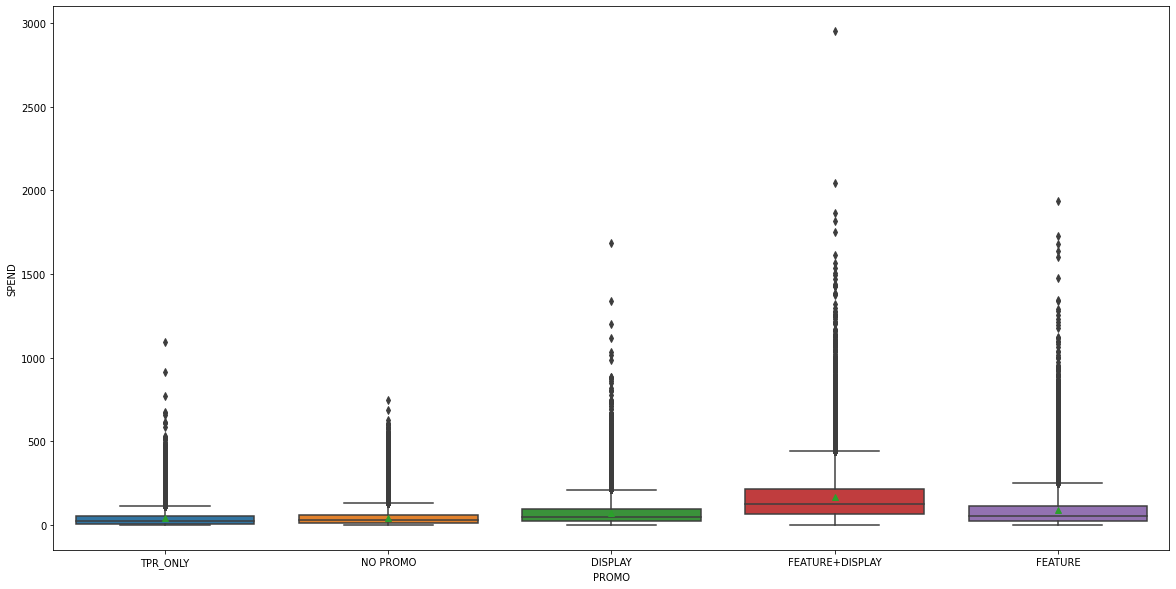

In [ ]:
#Overall SPEND variation on Various PROMOS
#Feature+Display Wins the GOLD
sns.boxplot(y = df.SPEND, x=df.PROMO,  showmeans=True)